In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm

In [ ]:
plt.rcParams['figure.figsize'] = (16, 6)

# define dataset
start_date = datetime(2018,6,15)
end_date = datetime(2023,6,16)
DATA = pd.read_csv('merged_New.csv', index_col = [0])
DATA.describe()


,DAAA,ADS_Index,Mkt-RF,SMB,HML,RMW,CMA,RF,AAPL_Close,GOOGL_Close,...,NIKKEI225,OBMMIJUMBO30YF,SP500,T10Y3M,T10YIE,Open,Close,High,Low,Volume
count,1251.000000,1255.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1259.000000,1259.000000,...,1175.000000,1246.000000,1258.000000,1248.000000,1248.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,3.380655,-0.322081,0.040546,-0.013434,-0.008214,0.025587,0.017423,0.005260,107.079685,90.196350,...,25131.908630,4.287041,3573.772337,0.524279,2.051971,206.431841,206.522753,208.631210,204.176878,3.021535e+07
std,0.812799,4.027584,1.415253,0.755770,1.138015,0.620877,0.555446,0.005408,46.367956,29.654722,...,3314.221429,1.171827,648.064109,0.885296,0.432989,72.413021,72.470620,73.171483,71.661830,1.284457e+07
min,2.010000,-26.487600,-12.000000,-4.550000,-5.000000,-2.160000,-2.790000,0.000000,34.209965,49.233501,...,16552.830000,2.812000,2237.400000,-1.890000,0.500000,90.719699,89.756622,93.418216,89.594523,8.989200e+06
25%,2.660000,-0.375082,-0.547500,-0.470000,-0.607500,-0.350000,-0.270000,0.000000,54.261374,61.380501,...,22218.815000,3.216500,2926.207500,0.077500,1.720000,133.586927,133.206581,134.602718,131.993535,2.221305e+07
50%,3.220000,-0.100215,0.080000,-0.030000,-0.060000,0.010000,-0.005000,0.006000,120.449112,87.362503,...,26014.620000,4.002500,3658.745000,0.550000,2.120000,213.639388,213.756760,216.612237,211.462469,2.703390e+07
75%,4.020000,0.350133,0.740000,0.410000,0.600000,0.370000,0.337500,0.009000,147.494804,114.317249,...,27973.685000,4.902750,4136.430000,1.260000,2.370000,265.041220,266.150284,269.612428,262.594236,3.425455e+07
max,5.410000,9.139330,9.340000,5.710000,6.740000,4.210000,2.460000,0.018000,186.009995,149.838501,...,33502.420000,7.198000,4796.560000,2.270000,3.020000,339.824922,348.100006,349.839996,337.438656,1.112421e+08


# EDA + Feature Engineering

In [ ]:
DATA.columns

Index(['DAAA', 'ADS_Index', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF',
       'AAPL_Close', 'GOOGL_Close', 'META_Close', 'TSLA_Close', 'DBAA',
       'DEXJPUS', 'CBBTCUSD', 'CBETHUSD', 'DEXUSEU', 'DEXUSUK', 'NIKKEI225',
       'OBMMIJUMBO30YF', 'SP500', 'T10Y3M', 'T10YIE', 'Open', 'Close', 'High',
       'Low', 'Volume'],
      dtype='object')

In [ ]:
DATA.isna().sum()

DAAA               8
ADS_Index          4
Mkt-RF            33
SMB               33
HML               33
RMW               33
CMA               33
RF                33
AAPL_Close         0
GOOGL_Close        0
META_Close         0
TSLA_Close         0
DBAA               8
DEXJPUS           21
CBBTCUSD           2
CBETHUSD           2
DEXUSEU           21
DEXUSUK           21
NIKKEI225         84
OBMMIJUMBO30YF    13
SP500              1
T10Y3M            11
T10YIE            11
Open               0
Close              0
High               0
Low                0
Volume             0
dtype: int64

In [ ]:
STOCK = yf.download('MSFT', start_date, end_date)

STOCK.describe()






[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,210.619651,212.861374,208.319444,210.711525,206.522754,3.021535e+07
std,71.583233,72.328309,70.842984,71.639130,72.470620,1.284457e+07
min,95.139999,97.970001,93.959999,94.129997,89.756645,8.989200e+06
25%,138.755005,139.650002,136.919998,138.320000,133.206604,2.221305e+07
50%,218.470001,220.889999,216.009995,218.589996,213.756744,2.703390e+07
75%,267.994995,272.099991,265.315002,268.729996,266.150269,3.425455e+07
max,344.619995,349.839996,342.200012,348.100006,348.100006,1.112421e+08


In [ ]:
X = DATA

col_names = X.columns

index = X.index
X = sm.add_constant(X)

In [ ]:
X = X.fillna(method='ffill')
X = X.fillna(method='bfill')

In [ ]:
numeric_values = pd.to_numeric(X['Mkt-RF'], errors='coerce')

non_numeric_values = X['Mkt-RF'][numeric_values.isna()]

# Print non-numeric values
print(non_numeric_values)

Series([], Name: Mkt-RF, dtype: float64)


In [ ]:
X.head()

,const,DAAA,ADS_Index,Mkt-RF,SMB,HML,RMW,CMA,RF,AAPL_Close,...,NIKKEI225,OBMMIJUMBO30YF,SP500,T10Y3M,T10YIE,Open,Close,High,Low,Volume
DATE,,,,,,,,,,,,,,,,,,,,,
2018-06-15,1.0,3.91,0.037080,-0.08,0.12,-0.24,0.65,-0.22,0.006,45.117435,...,22278.48,4.731,2773.75,0.98,2.12,96.007934,94.702728,96.026847,94.645983,65738600
2018-06-18,1.0,3.94,0.045600,-0.09,0.74,0.08,-0.41,0.09,0.006,45.093540,...,22278.48,4.768,2773.75,0.98,2.12,94.589246,95.393173,95.629623,94.031222,23586000
2018-06-19,1.0,3.93,0.047001,-0.38,0.54,-0.14,-0.24,-0.46,0.006,44.364838,...,22278.48,4.710,2762.59,0.95,2.12,94.248759,95.393173,95.525584,94.106888,28653100
2018-06-20,1.0,3.99,0.047744,0.23,0.66,-0.51,-0.15,0.10,0.006,44.558350,...,22555.43,4.676,2767.32,0.99,2.12,95.875551,96.348450,96.963213,95.639101,26180800
2018-06-21,1.0,3.98,0.047828,-0.73,-0.55,0.33,0.45,0.00,0.006,44.309895,...,22693.04,4.724,2749.76,0.96,2.11,96.547042,95.657990,96.906442,95.412080,23198200


In [ ]:
y = np.diff(np.log(STOCK['Adj Close'].values))

y = np.append(y[0], y)

X = pd.DataFrame(X, columns=col_names, index=index)

# print(X)
print(y)

print(STOCK['Adj Close'])

[0.00726397 0.00726397 0.         ... 0.00732583 0.00908241 0.0313985 ]
Date
2018-06-15     94.702736
2018-06-18     95.393158
2018-06-19     95.393158
2018-06-20     96.348427
2018-06-21     95.657990
                 ...    
2023-06-09    326.790009
2023-06-12    331.850006
2023-06-13    334.290009
2023-06-14    337.339996
2023-06-15    348.100006
Name: Adj Close, Length: 1259, dtype: float64


In [ ]:
X_Col = X.select_dtypes(include=np.number).columns.to_list()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 2018-06-15 to 2023-06-15
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DAAA            1259 non-null   float64
 1   ADS_Index       1259 non-null   float64
 2   Mkt-RF          1259 non-null   float64
 3   SMB             1259 non-null   float64
 4   HML             1259 non-null   float64
 5   RMW             1259 non-null   float64
 6   CMA             1259 non-null   float64
 7   RF              1259 non-null   float64
 8   AAPL_Close      1259 non-null   float64
 9   GOOGL_Close     1259 non-null   float64
 10  META_Close      1259 non-null   float64
 11  TSLA_Close      1259 non-null   float64
 12  DBAA            1259 non-null   float64
 13  DEXJPUS         1259 non-null   float64
 14  CBBTCUSD        1259 non-null   float64
 15  CBETHUSD        1259 non-null   float64
 16  DEXUSEU         1259 non-null   float64
 17  DEXUSUK         1259 no

In [ ]:
X.isna().sum()

DAAA              0
ADS_Index         0
Mkt-RF            0
SMB               0
HML               0
RMW               0
CMA               0
RF                0
AAPL_Close        0
GOOGL_Close       0
META_Close        0
TSLA_Close        0
DBAA              0
DEXJPUS           0
CBBTCUSD          0
CBETHUSD          0
DEXUSEU           0
DEXUSUK           0
NIKKEI225         0
OBMMIJUMBO30YF    0
SP500             0
T10Y3M            0
T10YIE            0
Open              0
Close             0
High              0
Low               0
Volume            0
dtype: int64

In [ ]:
X.shape

(1259, 28)

In [ ]:
y.shape

(1259,)

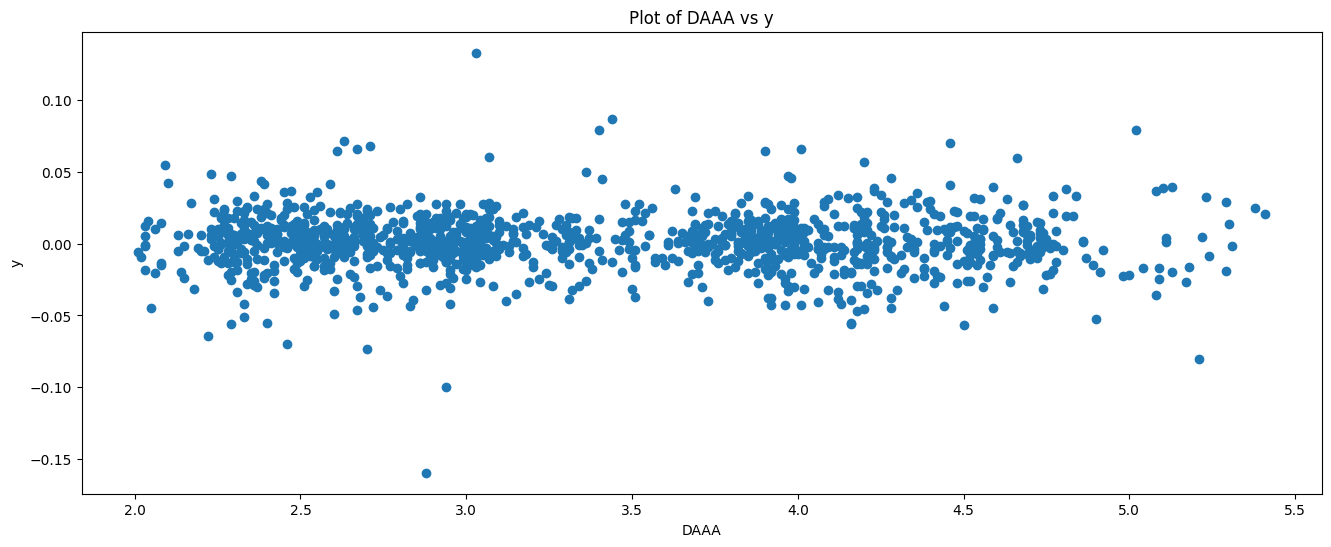

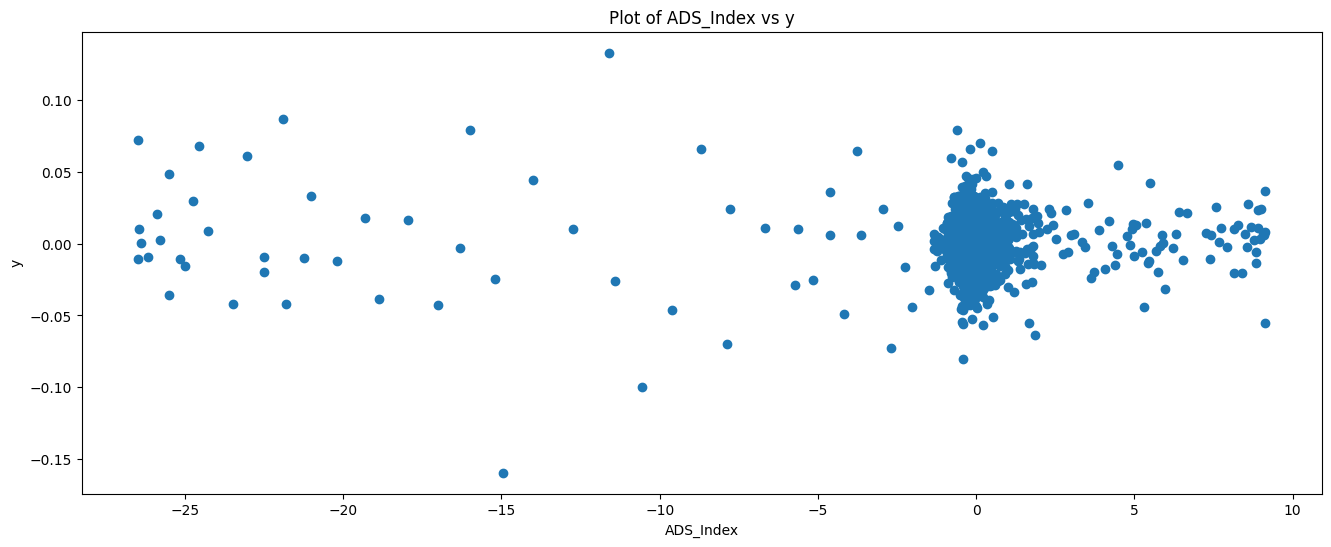

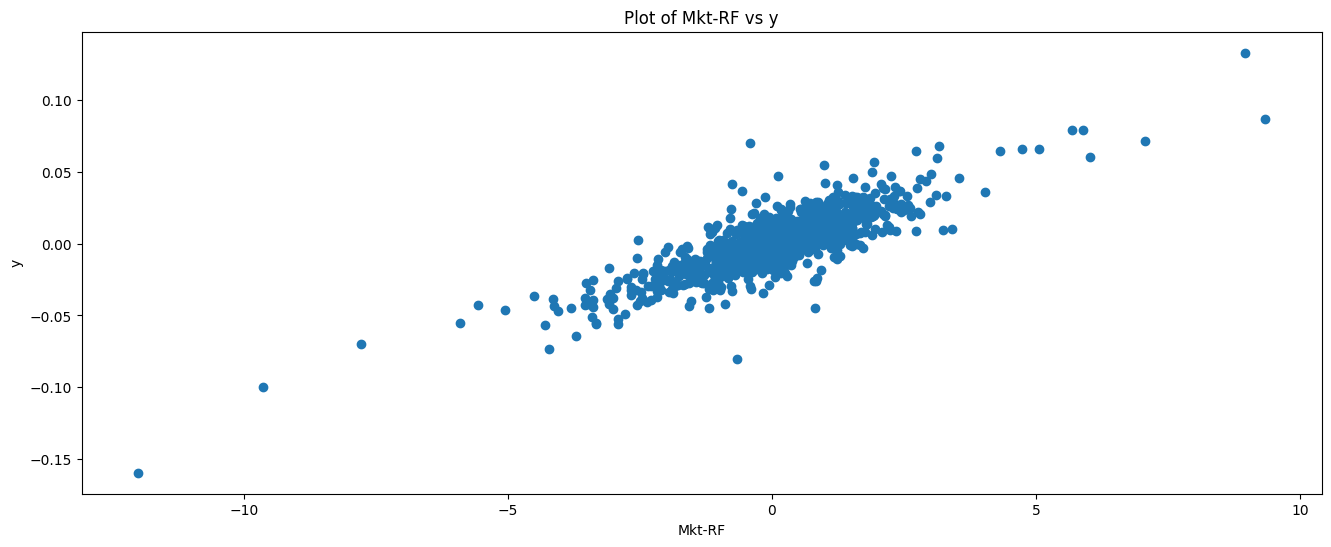

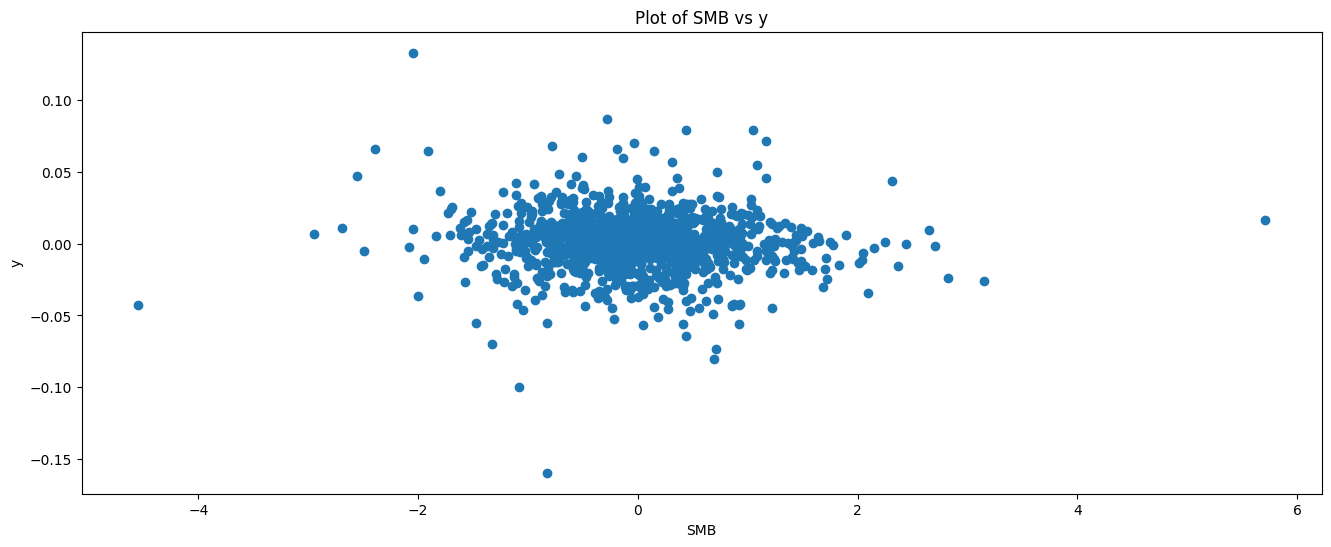

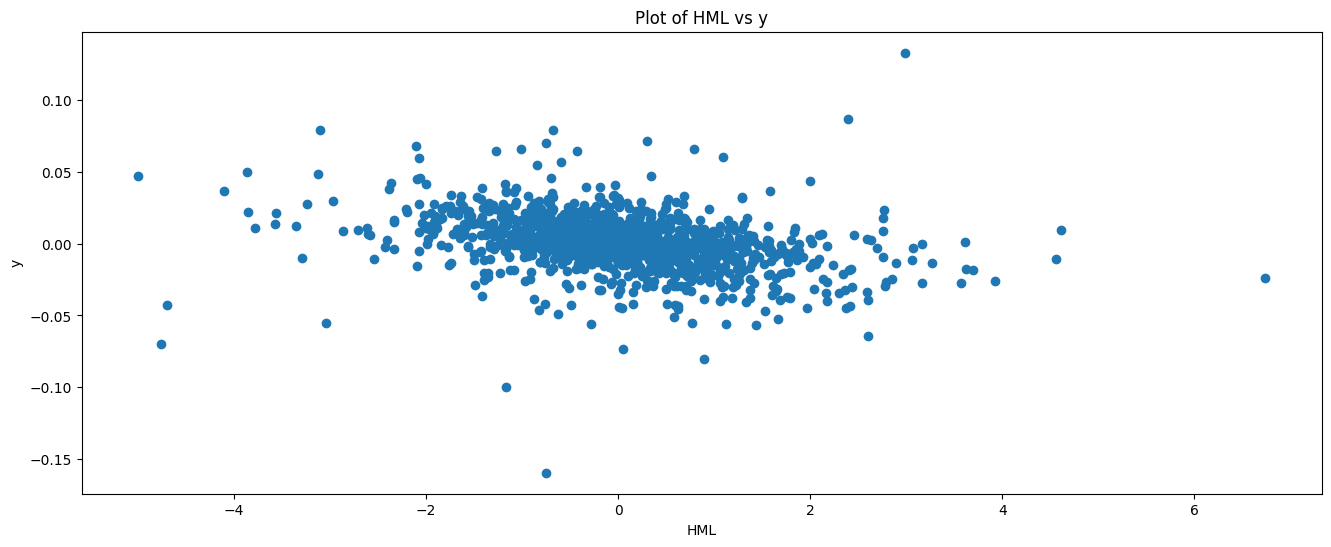

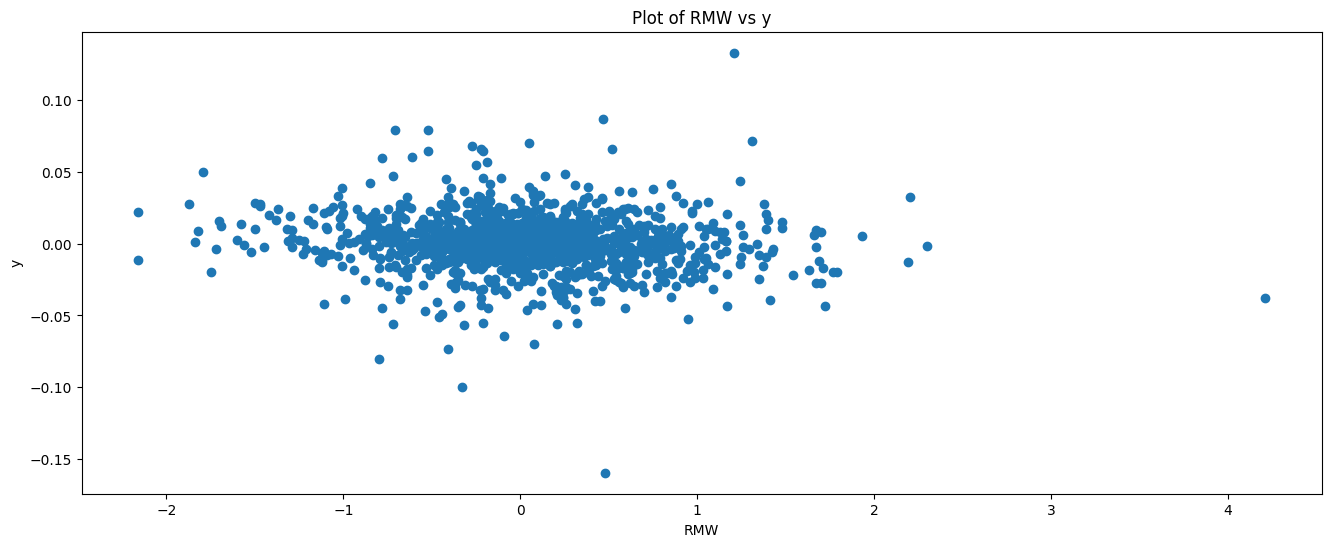

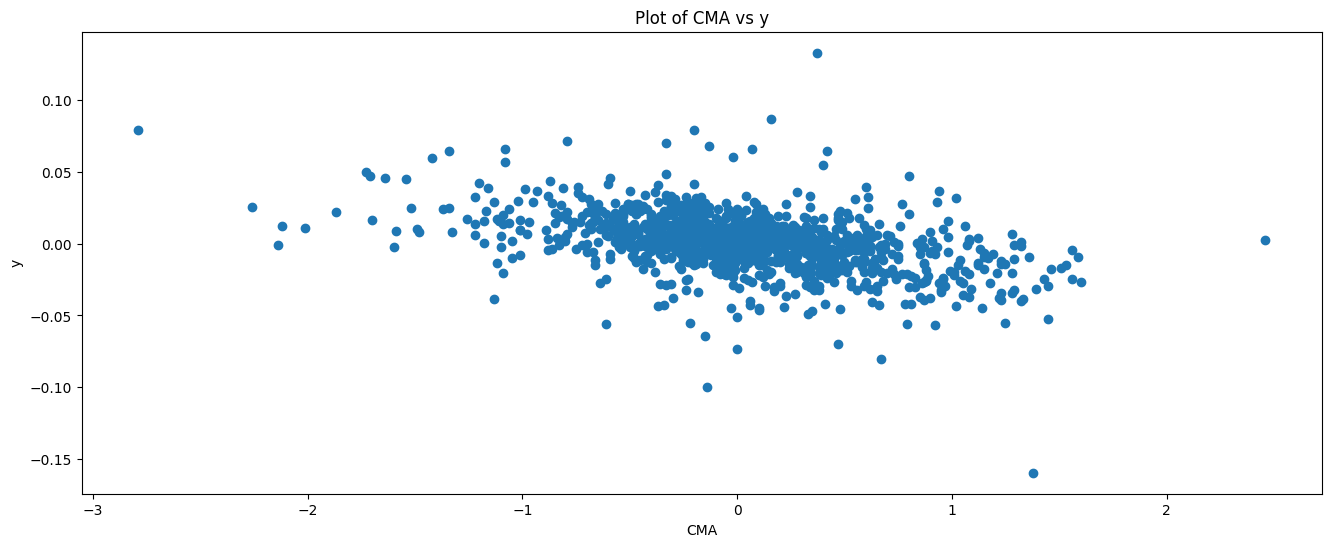

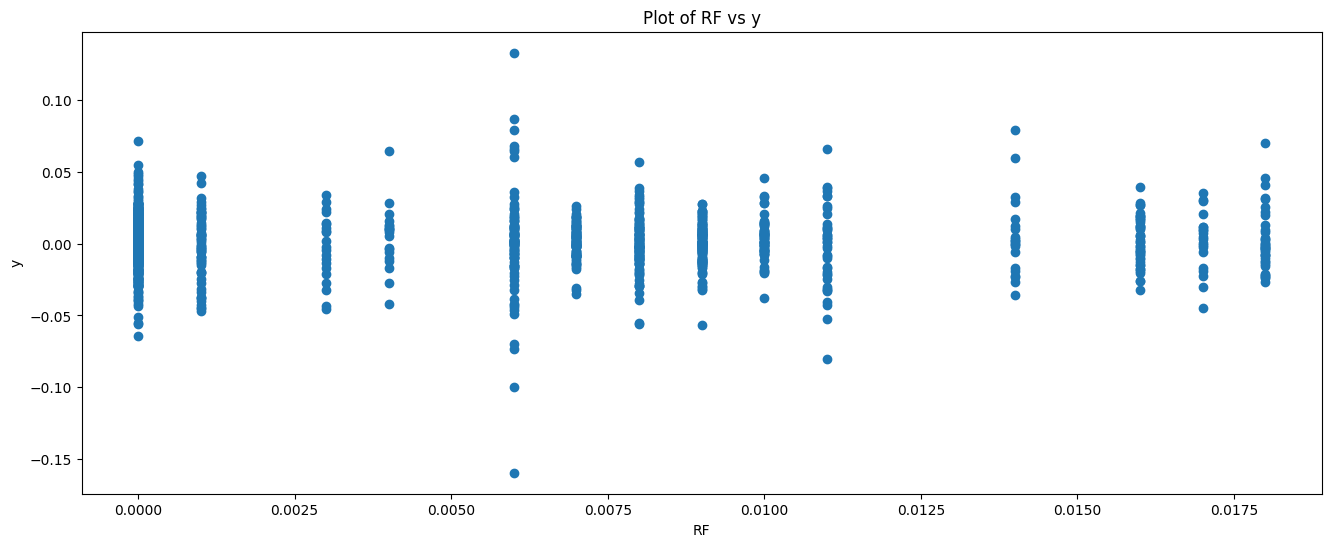

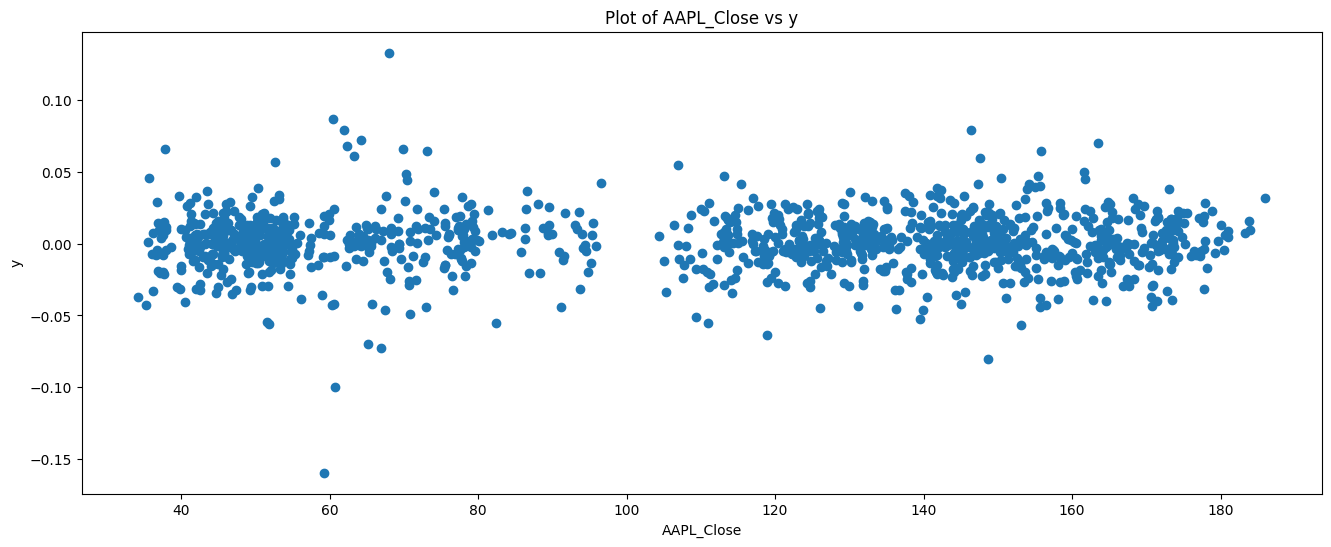

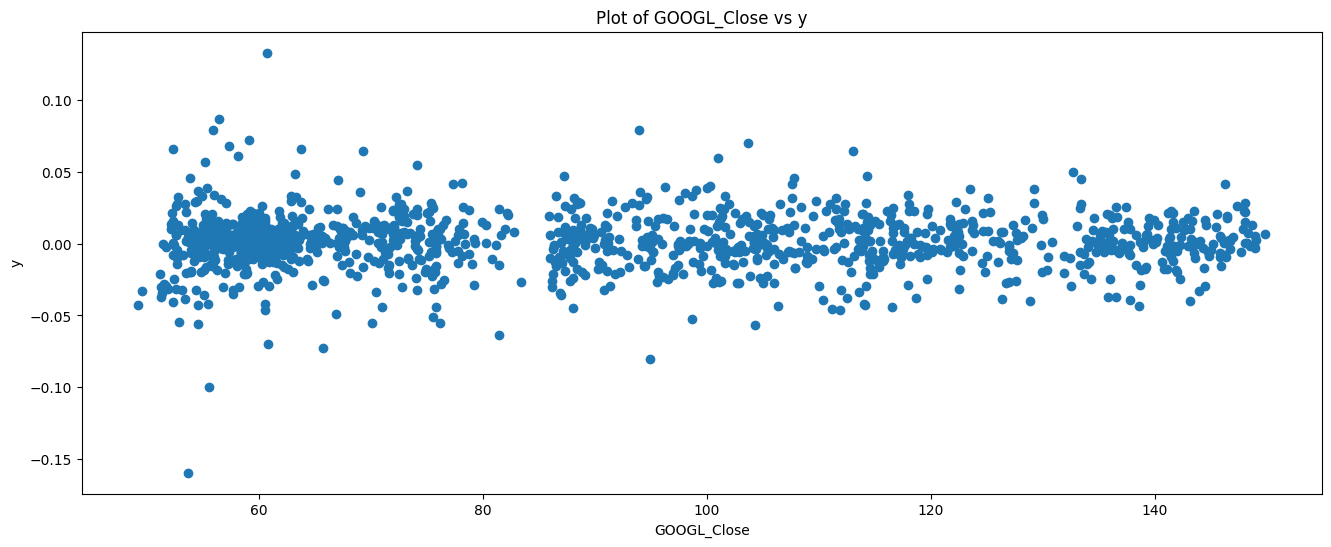

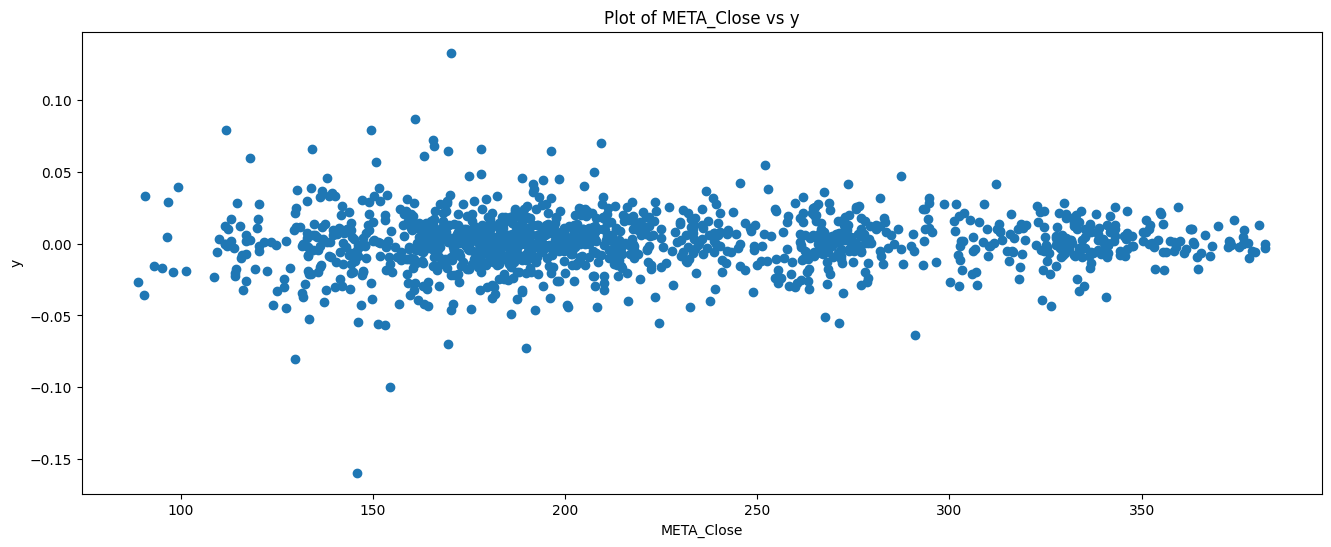

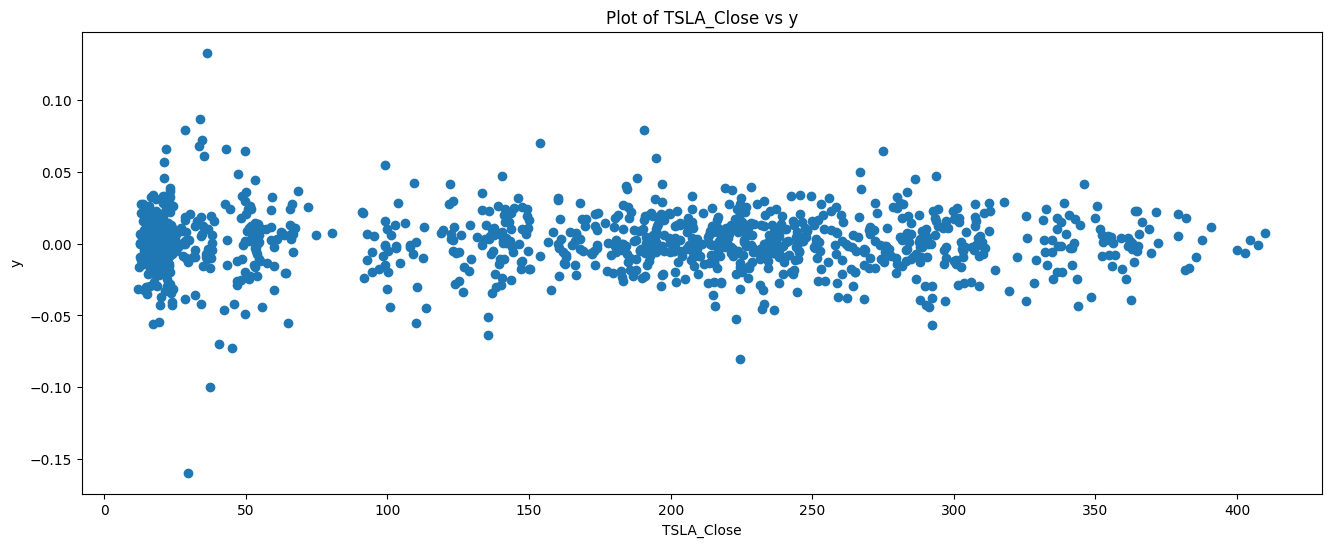

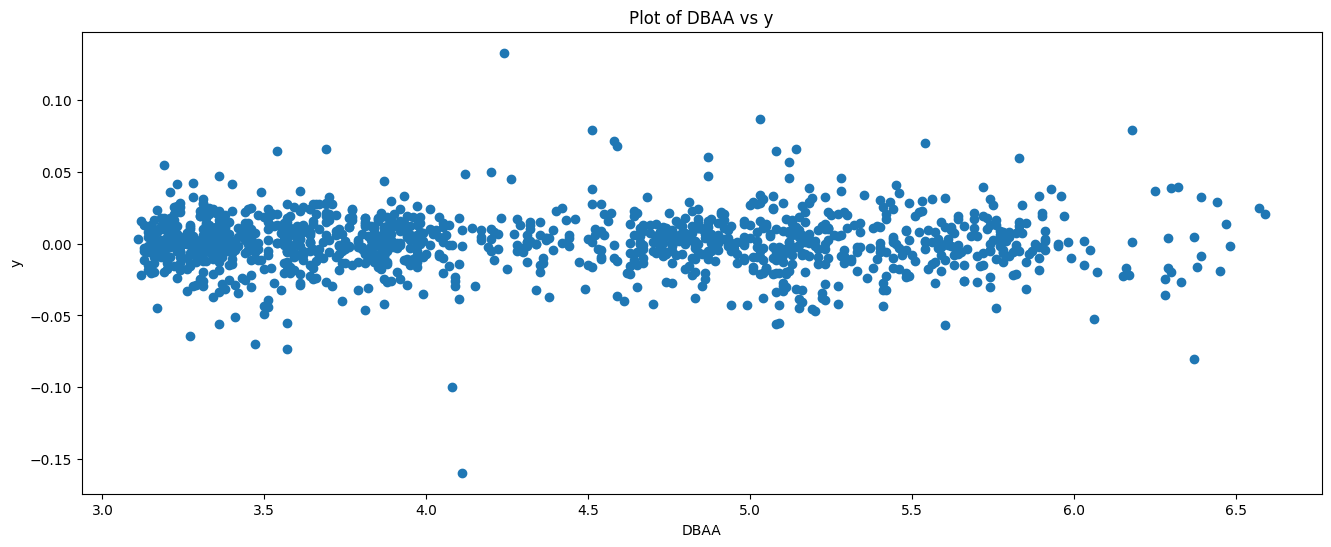

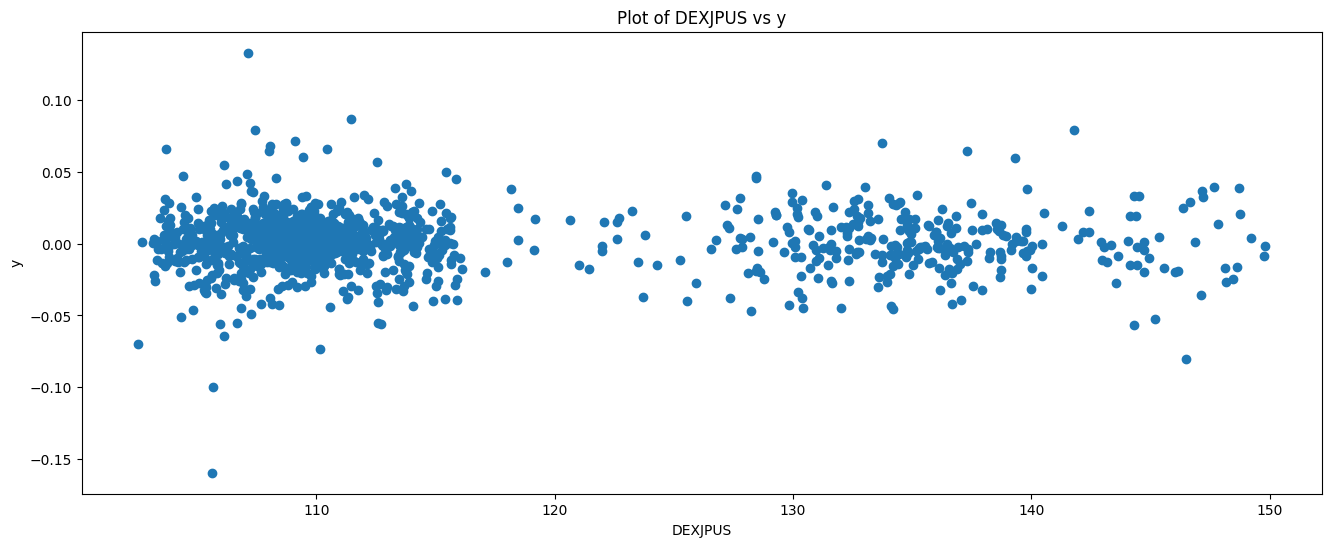

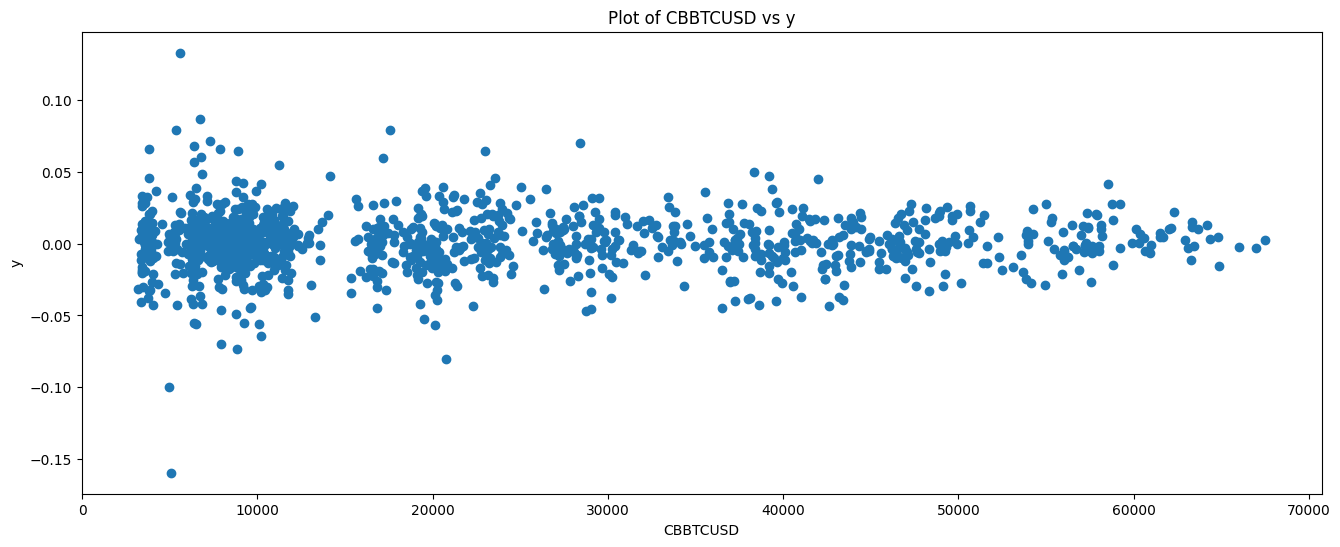

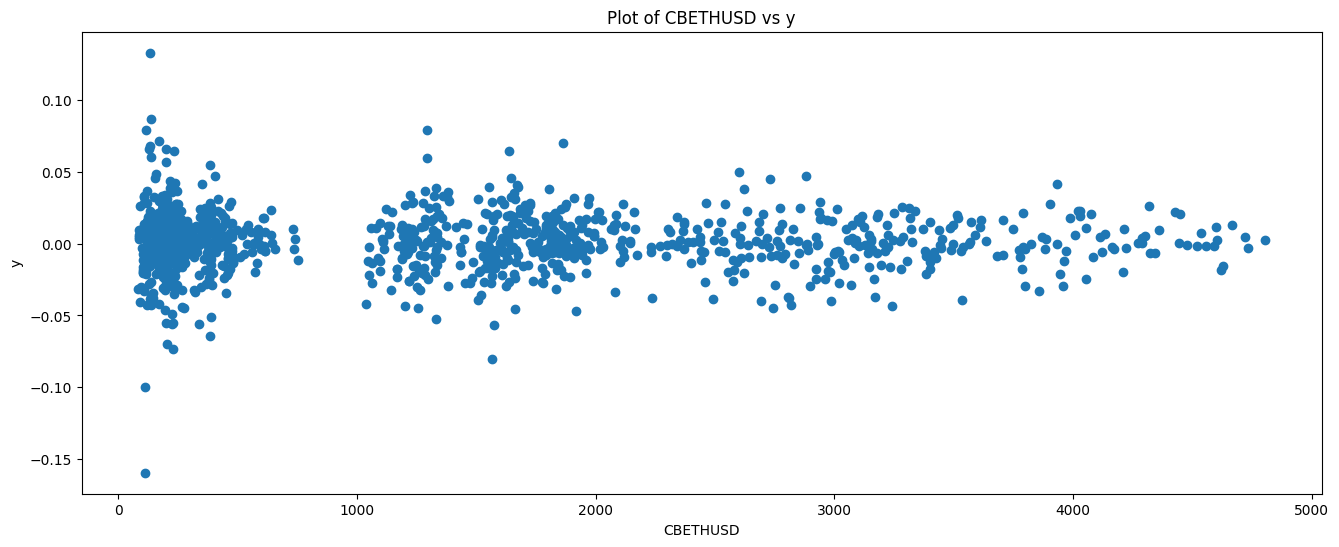

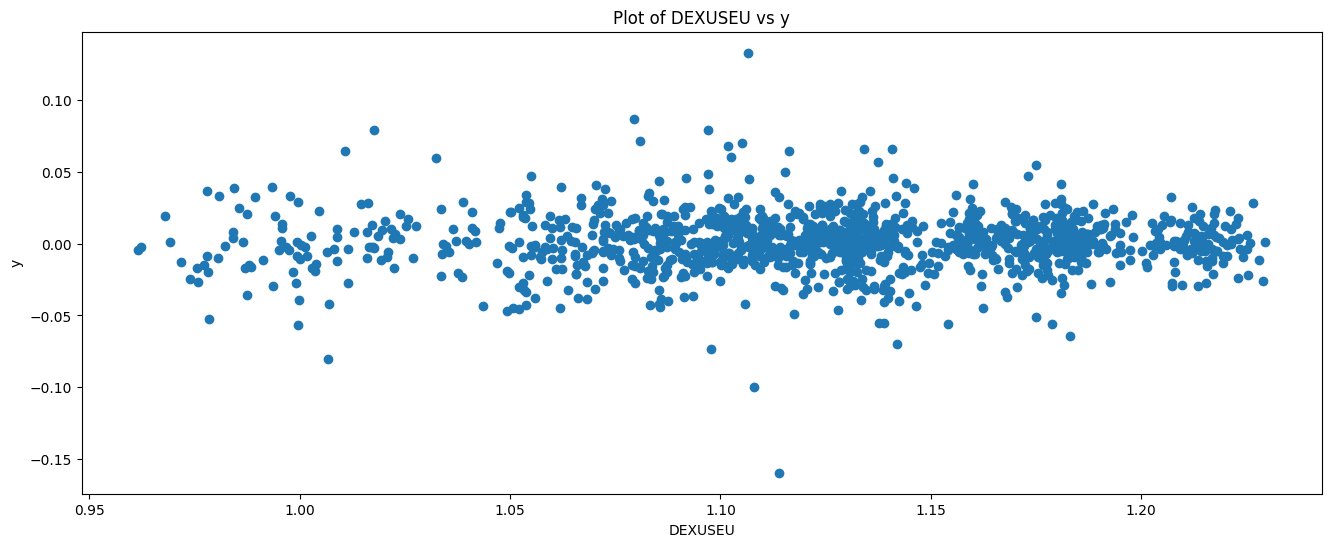

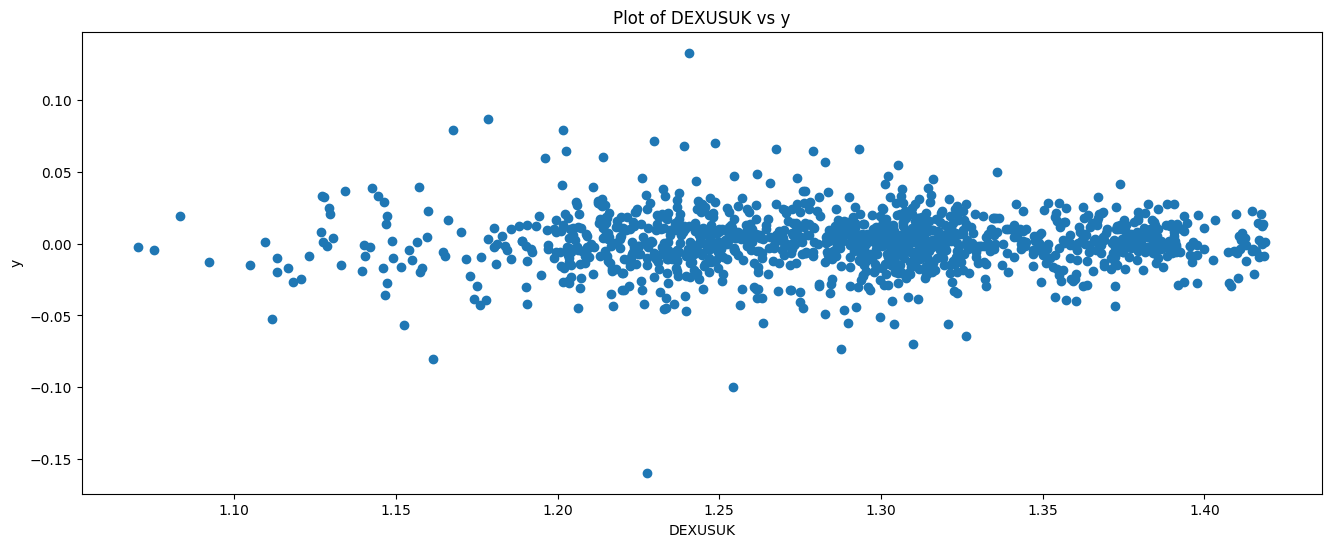

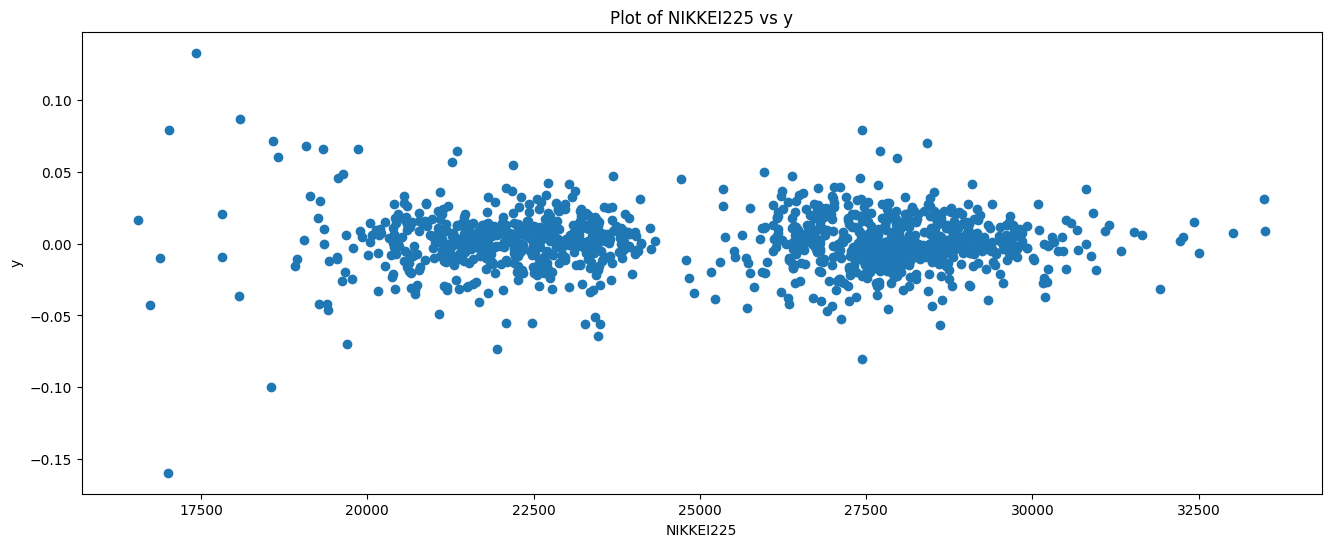

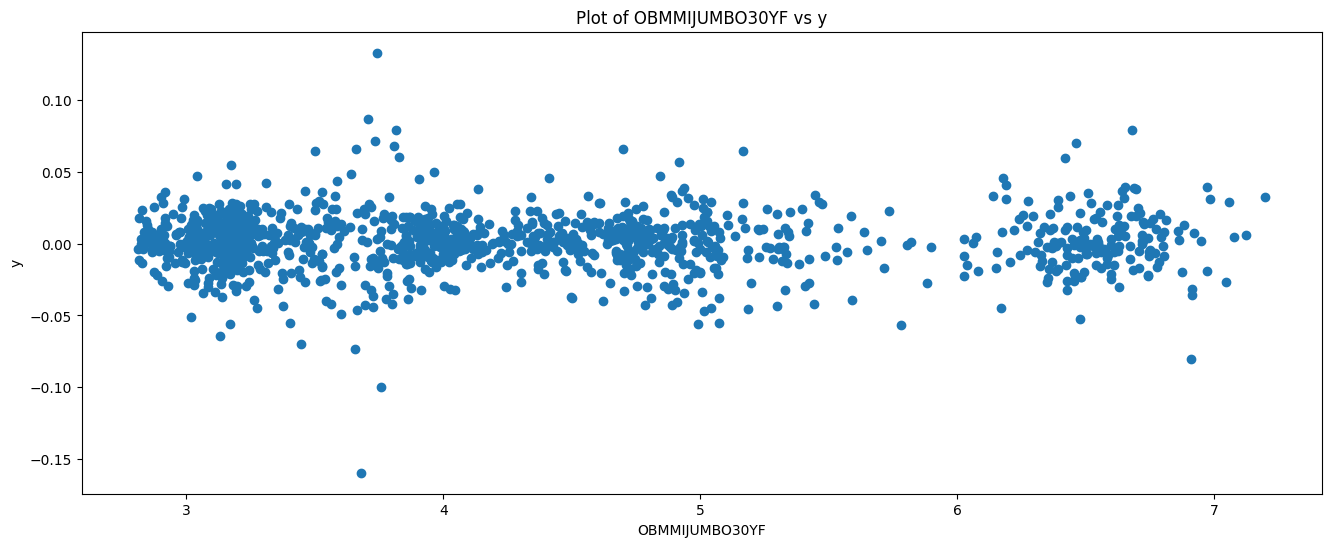

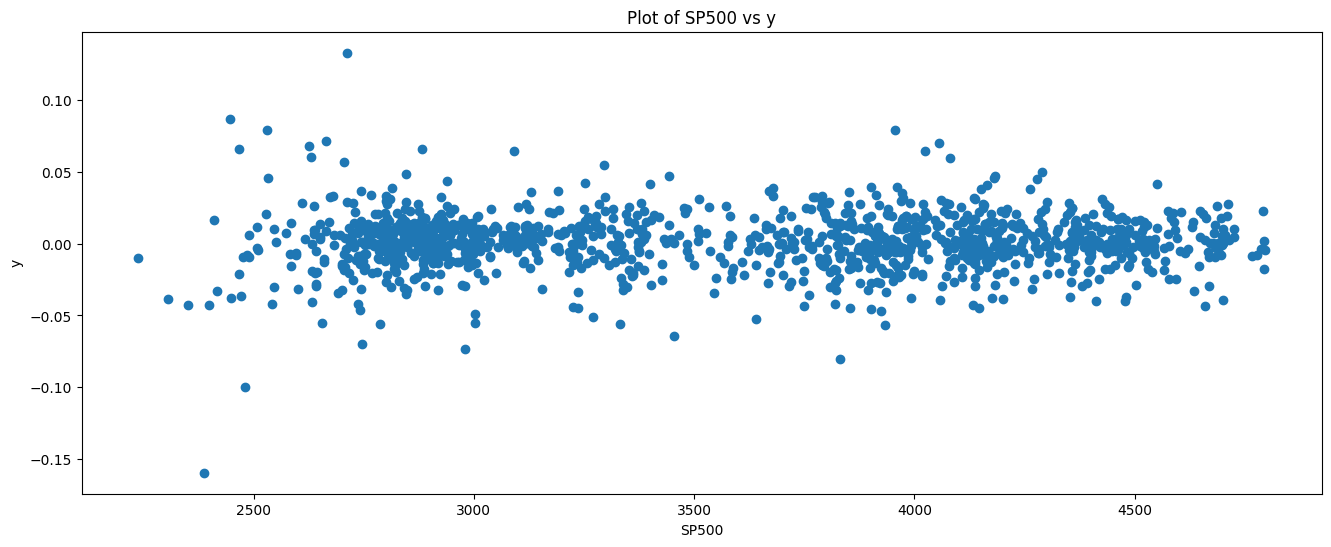

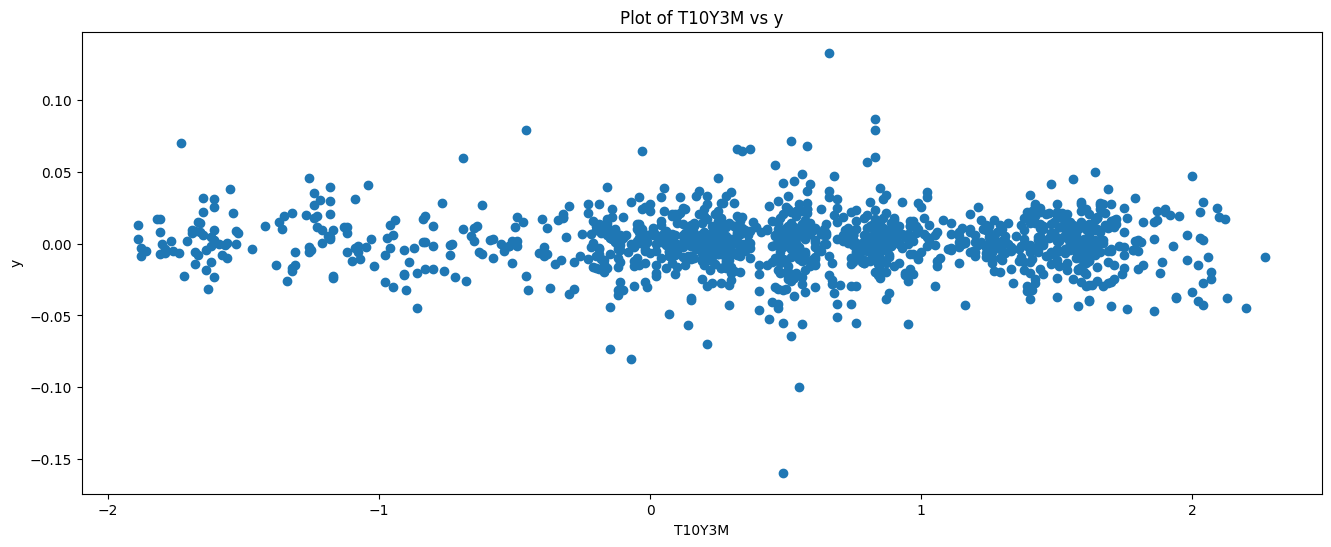

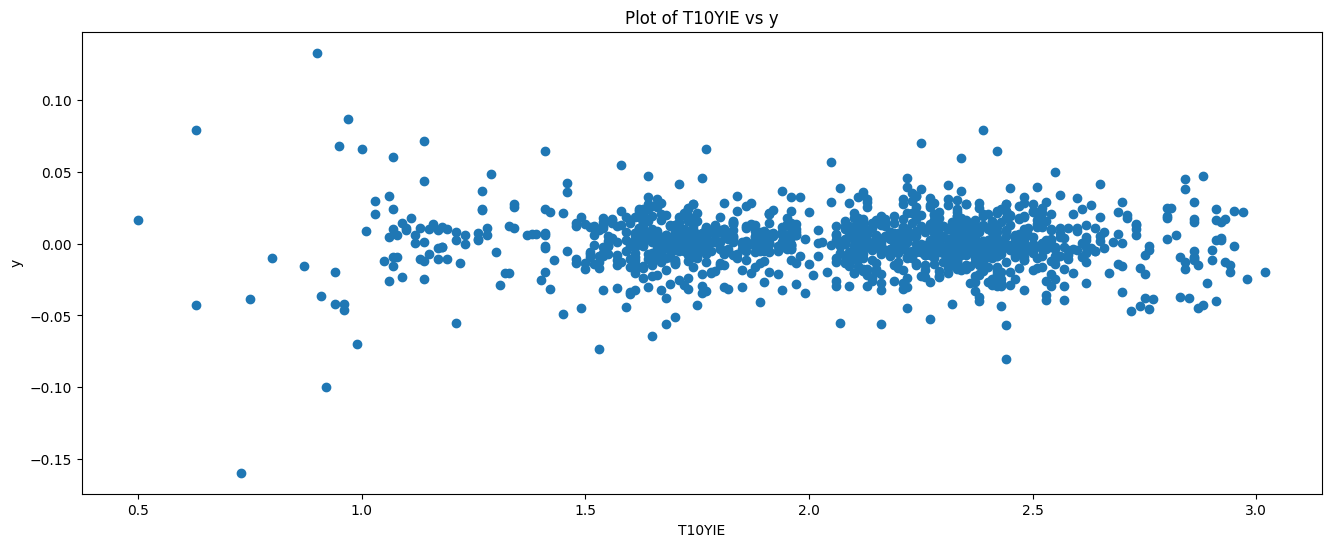

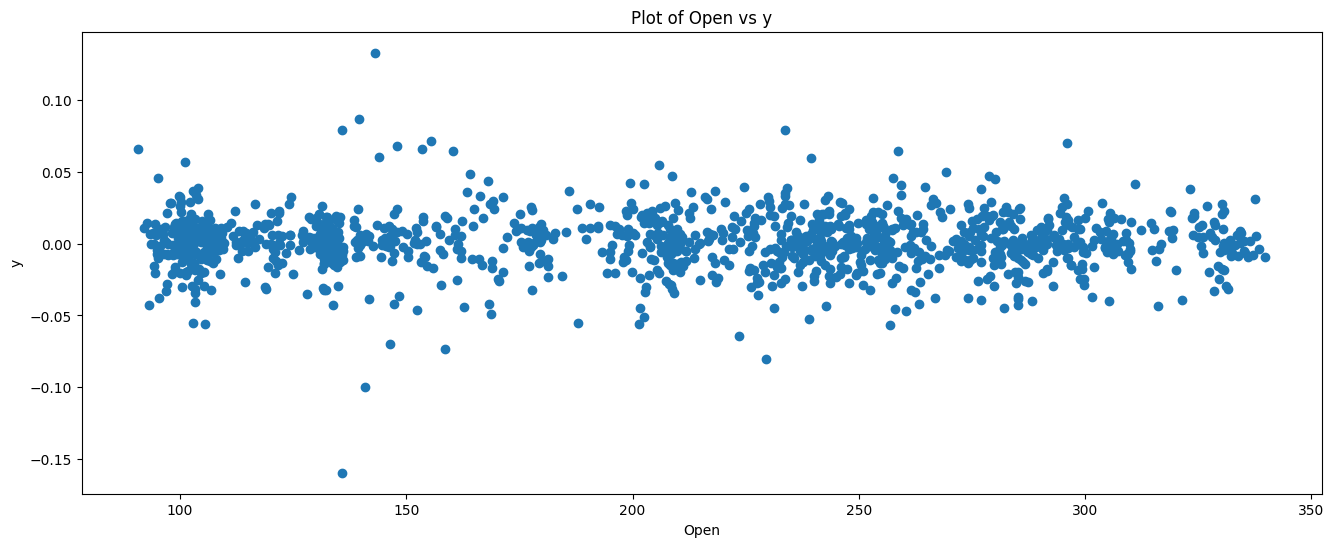

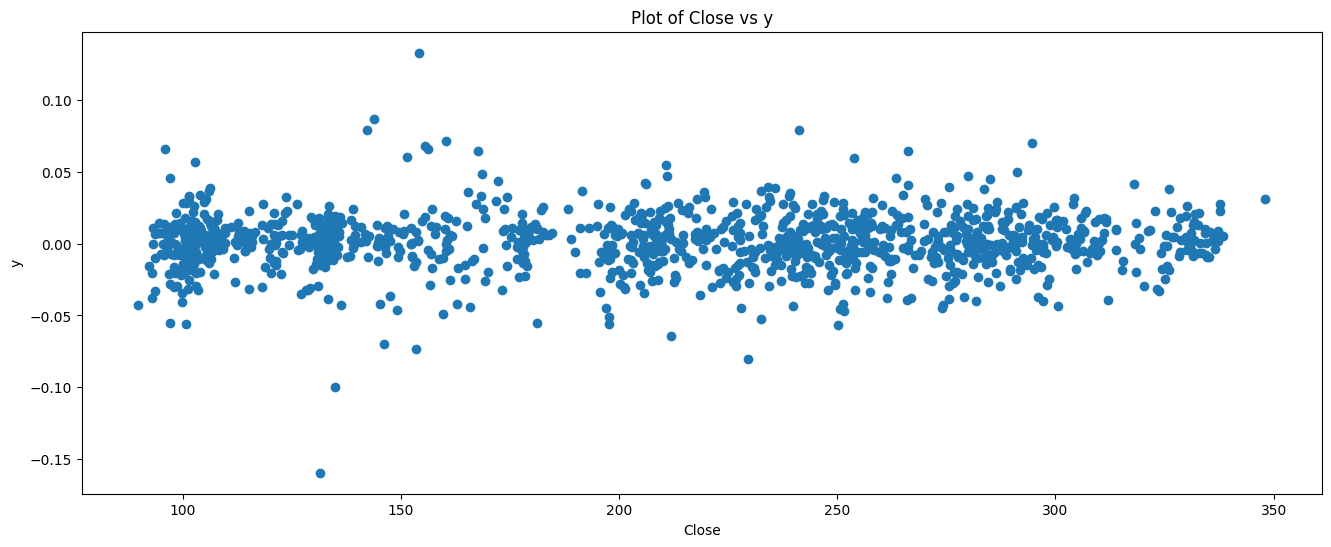

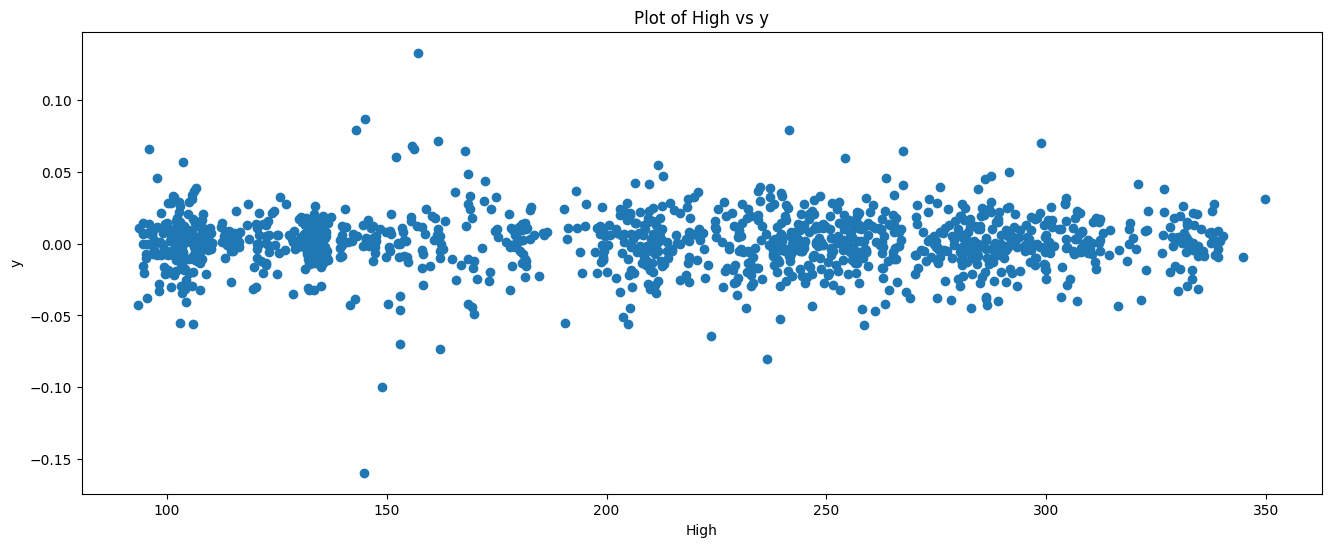

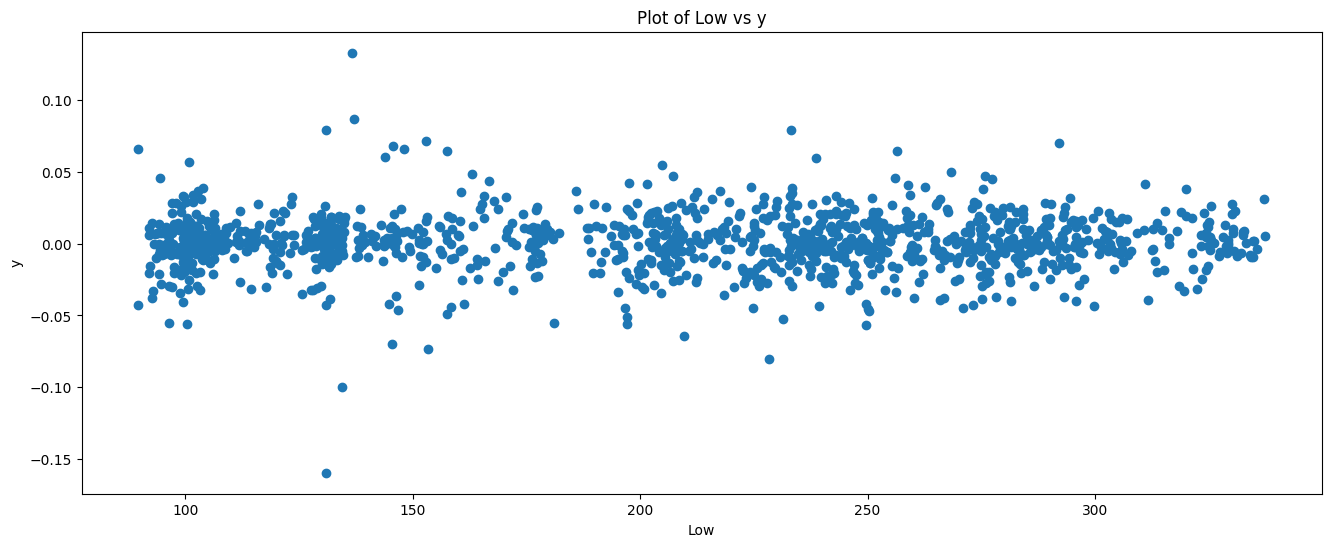

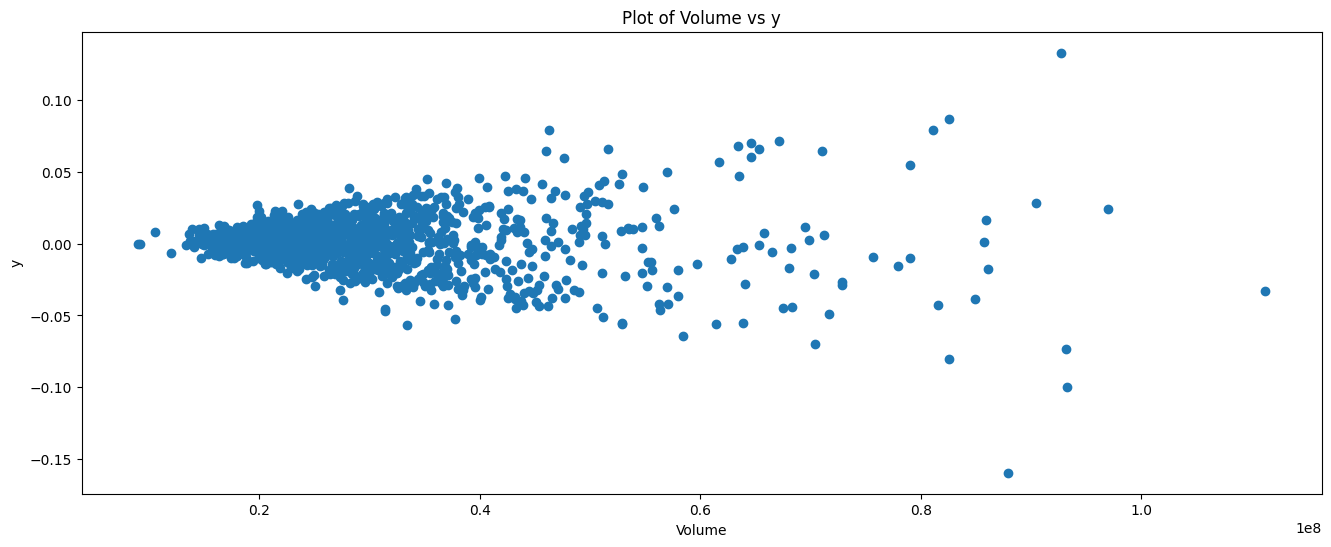

In [ ]:
for feature in DATA.columns:
    plt.figure()  # Create a new figure for each plot
    plt.scatter(DATA[feature], y)  # Scatter plot between feature and y
    plt.xlabel(feature)  # Set x-axis label as feature name
    plt.ylabel('y')  # Set y-axis label as 'y'
    plt.title(f'Plot of {feature} vs y')  # Set the title for the plot
    plt.show()  # Show the plot

In [ ]:
corr =X.corr()

<Axes: >

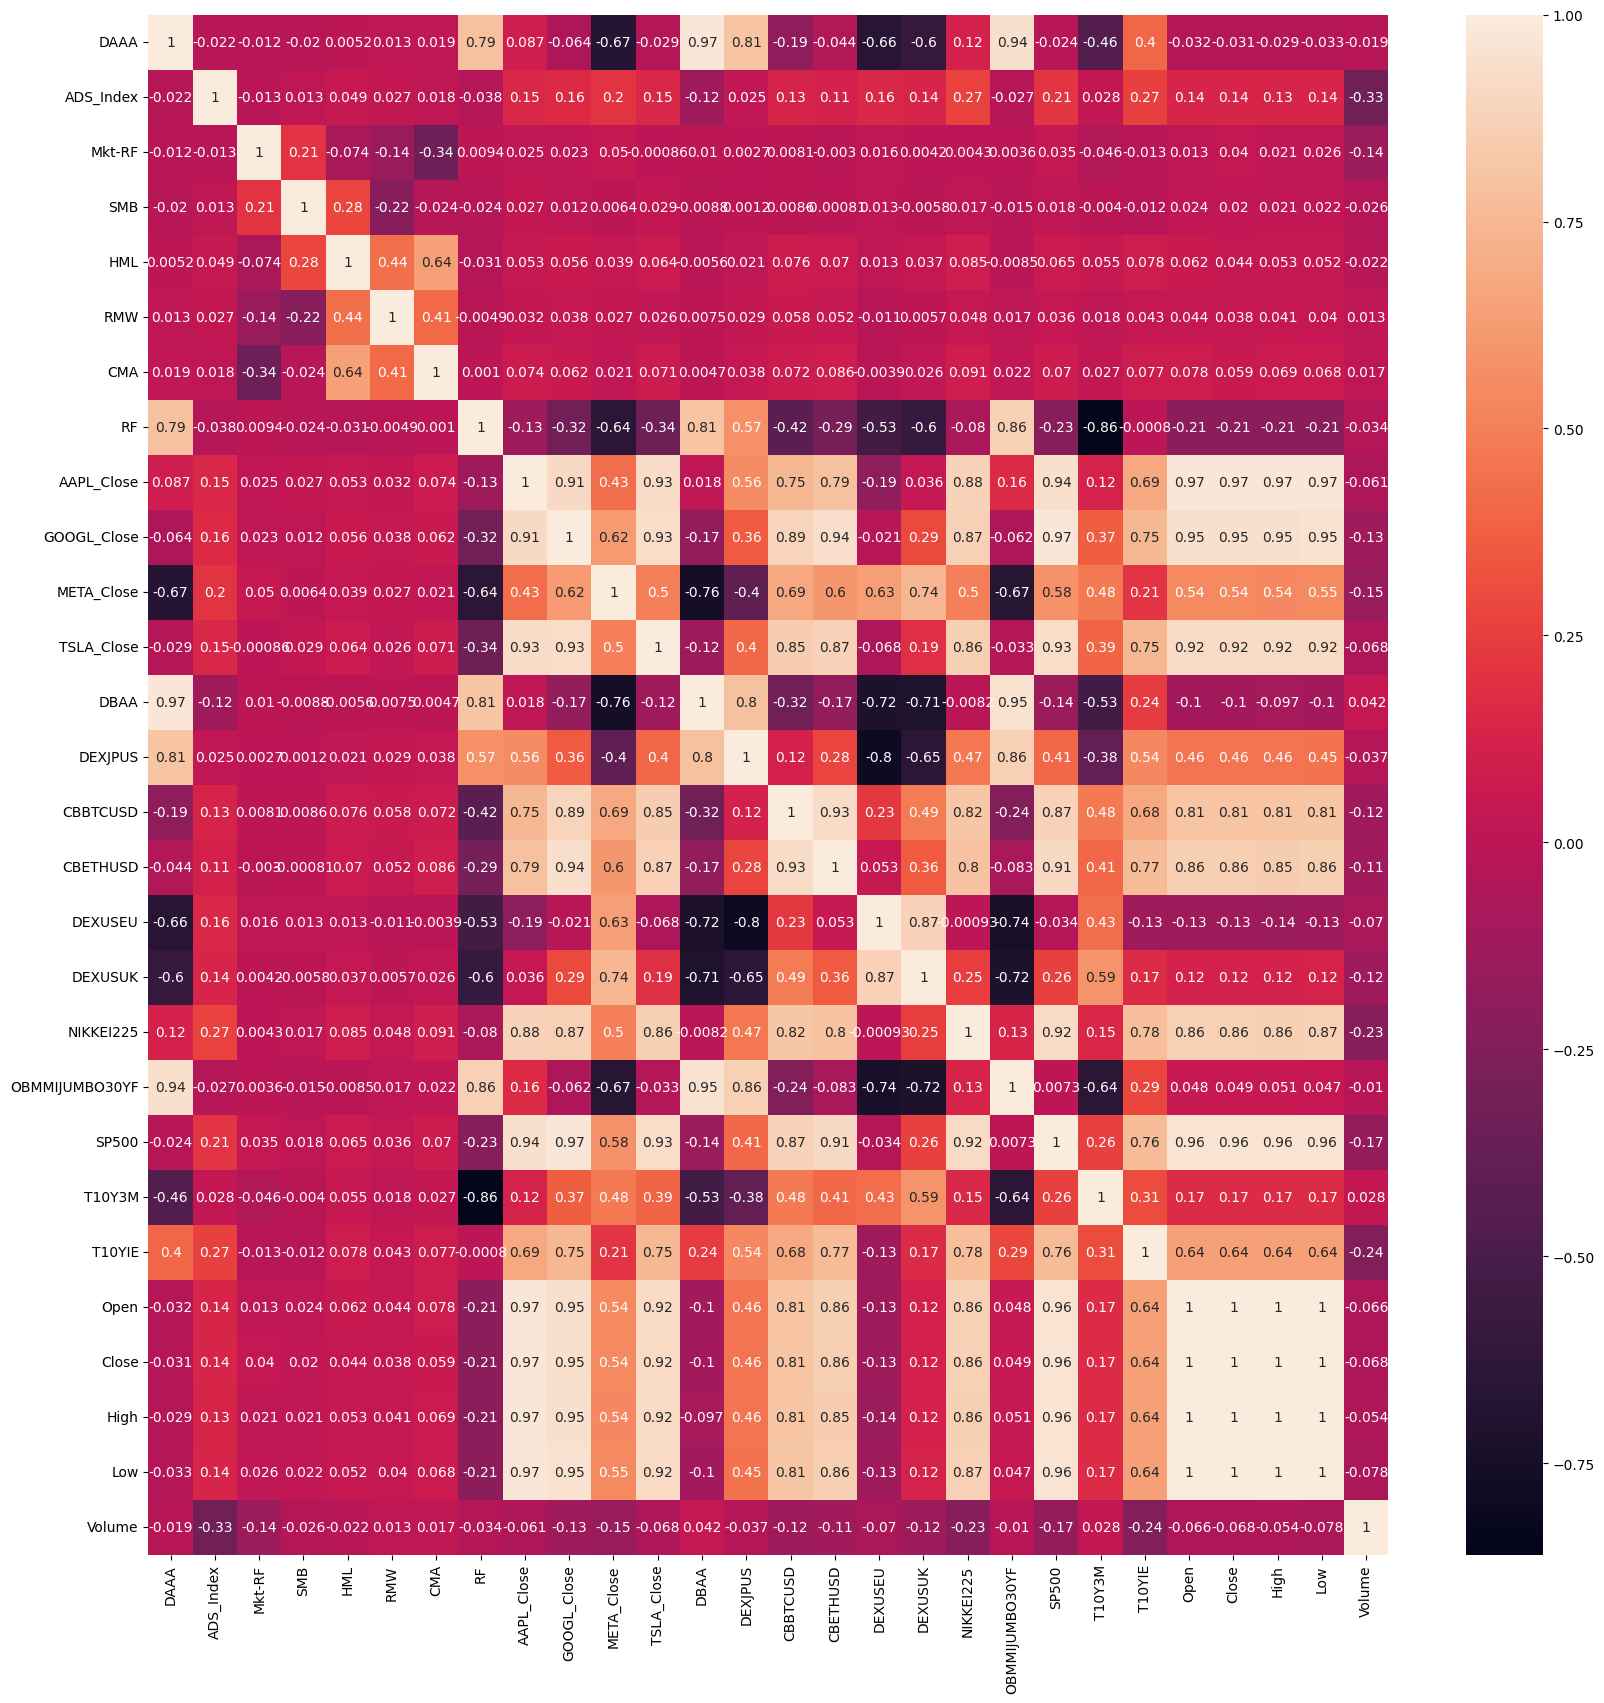

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr,xticklabels=X.columns,yticklabels=X.columns,annot=True,ax=ax)

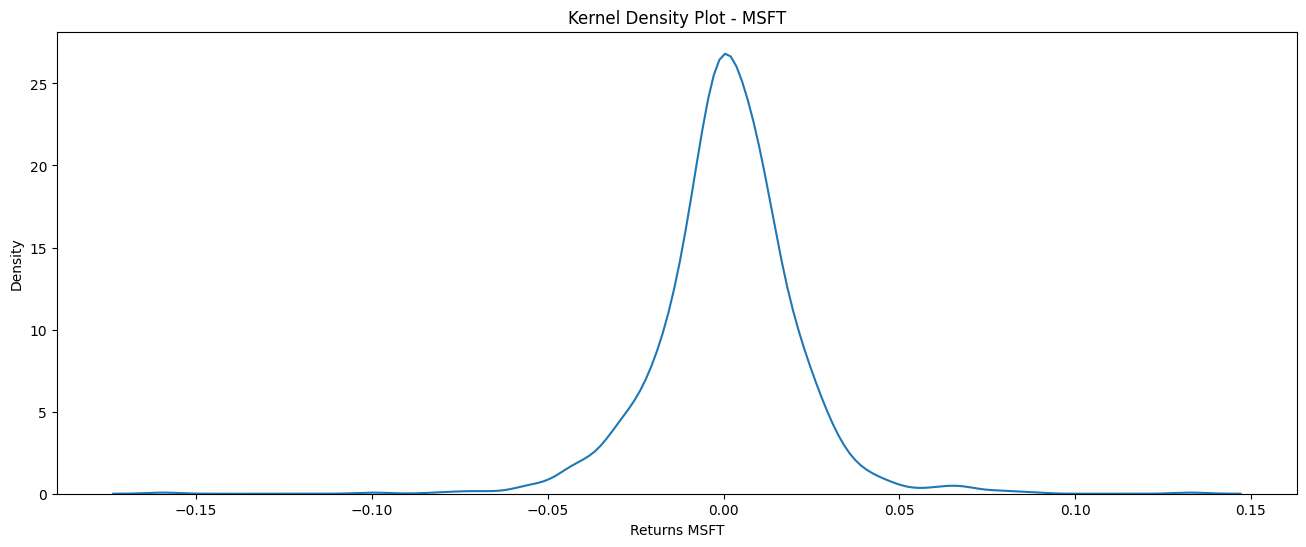

In [ ]:
import seaborn as sns
symbol = "MSFT"
sns.kdeplot(y)
plt.xlabel("Returns MSFT")
plt.ylabel("Density")
plt.title(f"Kernel Density Plot - {symbol}")
plt.show()

In [ ]:
X= pd.DataFrame(X,columns=X_Col)

# Feature Selection

## Ridge -  L1

In [ ]:
# ------------------------------------------------------------------------------
# Factor Selection using Ridge Regression
# ------------------------------------------------------------------------------
a = 0.5
model2_prep = linear_model.Ridge(alpha=a, fit_intercept=False).fit(X, y)
model2_select = X.columns[np.abs(model2_prep.coef_)>=0.001]
x = X[model2_select]
model2 = sm.OLS(y,x).fit()
print(model2.summary())
y_pred_model2 = model2.predict(x)
corr_model2 = ss.pearsonr(y_pred_model2, y)[0]
print('model 2 Ridge Regression: corr (Y, Y_pred) = '+str(corr_model2))
print('Ridge Regression selected ' +str(len(model2_select)) +' features: ', model2_select.values)




                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.830
Method:                 Least Squares   F-statistic:                              615.4
Date:                Wed, 28 Jun 2023   Prob (F-statistic):                        0.00
Time:                        00:35:29   Log-Likelihood:                          4280.8
No. Observations:                1259   AIC:                                     -8542.
Df Residuals:                    1249   BIC:                                     -8490.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.62953e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## LASSO - L2

In [ ]:
# ------------------------------------------------------------------------------
# Factor Selection using LASSO
# ------------------------------------------------------------------------------
a = 0.01
model3_prep = linear_model.Lasso(alpha=a, fit_intercept=False).fit(X, y)
model3_select = X.columns[np.abs(model3_prep.coef_)>=0.001]
print(model3_select)
x = X[model3_select]
model3 = sm.OLS(y,x).fit()
print(model3.summary())
y_pred_model3 = model3.predict(x)
corr_model3 = ss.pearsonr(y_pred_model3, y)[0]
print('model 3 LASSO: corr (Y, Y_pred) = '+str(corr_model3))
print('LASSO selected ' +str(len(model3_select)) +' features: ', model3_select.values)


Index(['Mkt-RF'], dtype='object')
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.690
Model:                            OLS   Adj. R-squared (uncentered):              0.690
Method:                 Least Squares   F-statistic:                              2804.
Date:                Wed, 28 Jun 2023   Prob (F-statistic):                   1.73e-322
Time:                        00:35:42   Log-Likelihood:                          3898.5
No. Observations:                1259   AIC:                                     -7795.
Df Residuals:                    1258   BIC:                                     -7790.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.696e-01, tolerance: 4.864e-05
  model = cd_fast.enet_coordinate_descent(


## Elastic Net

In [ ]:
# ------------------------------------------------------------------------------
# Factor Selection using Elastic Net
# ------------------------------------------------------------------------------
a = 0.01
model4_prep = linear_model.ElasticNet(alpha=a, fit_intercept=False).fit(X, y)
model4_select = X.columns[np.abs(model4_prep.coef_)!=0.0]
x = X[model4_select]
model4 = sm.OLS(y,x).fit()
print(model4.summary())
y_pred_model4 = model4.predict(x)
corr_model4 = ss.pearsonr(y_pred_model4, y)[0]
print('model 4 Elastic Net: corr (Y, Y_pred) = '+str(corr_model3))
print('ElasticNet selected ' +str(len(model4_select)) +' features: ', model4_select.values)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.810
Method:                 Least Squares   F-statistic:                              413.8
Date:                Wed, 28 Jun 2023   Prob (F-statistic):                        0.00
Time:                        00:35:45   Log-Likelihood:                          4212.6
No. Observations:                1259   AIC:                                     -8399.
Df Residuals:                    1246   BIC:                                     -8332.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.223e-01, tolerance: 4.864e-05
  model = cd_fast.enet_coordinate_descent(


## XGB Regressor

In [ ]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# Create an XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Train the model
xgb_model.fit(X, y)

# Get feature importances
importances = xgb_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort indices based on feature importance
indices = np.argsort(importances)[::-1]

model5_select=[]
# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    if importances[indices[f]]>0.02:
      print(f"{f + 1}. Feature '{feature_names[indices[f]]}': {importances[indices[f]]}")
      model5_select.append(feature_names[indices[f]])

x = X[model5_select]
model5 = sm.OLS(y,x).fit()
print(model5.summary())
y_pred_model5 = model5.predict(x)
corr_model5 = ss.pearsonr(y_pred_model5, y)[0]
print('model 5 Elastic Net: corr (Y, Y_pred) = '+str(corr_model5))
print('XGB Regressor ' +str(len(model5_select)) +' features: ', model5_select)

Feature ranking:
1. Feature 'Mkt-RF': 0.39189109206199646
2. Feature 'HML': 0.08105158060789108
3. Feature 'Volume': 0.06424577534198761
4. Feature 'SMB': 0.04827532544732094
5. Feature 'T10Y3M': 0.037498194724321365
6. Feature 'CMA': 0.03404470533132553
7. Feature 'T10YIE': 0.02621917985379696
8. Feature 'RMW': 0.023474765941500664
9. Feature 'Close': 0.022318854928016663
10. Feature 'NIKKEI225': 0.022058159112930298
11. Feature 'OBMMIJUMBO30YF': 0.02066955529153347
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.797
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              446.4
Date:                Wed, 28 Jun 2023   Prob (F-statistic):                        0.00
Time:                        00:35:47   Log-Likelihood:                          4165.5


Feature ranking:
1. Feature 'Mkt-RF': 0.39189109206199646
2. Feature 'HML': 0.08105158060789108
3. Feature 'Volume': 0.06424577534198761
4. Feature 'SMB': 0.04827532544732094
5. Feature 'T10Y3M': 0.037498194724321365
6. Feature 'CMA': 0.03404470533132553
7. Feature 'T10YIE': 0.02621917985379696
8. Feature 'RMW': 0.023474765941500664
9. Feature 'Close': 0.022318854928016663
10. Feature 'NIKKEI225': 0.022058159112930298
11. Feature 'OBMMIJUMBO30YF': 0.02066955529153347


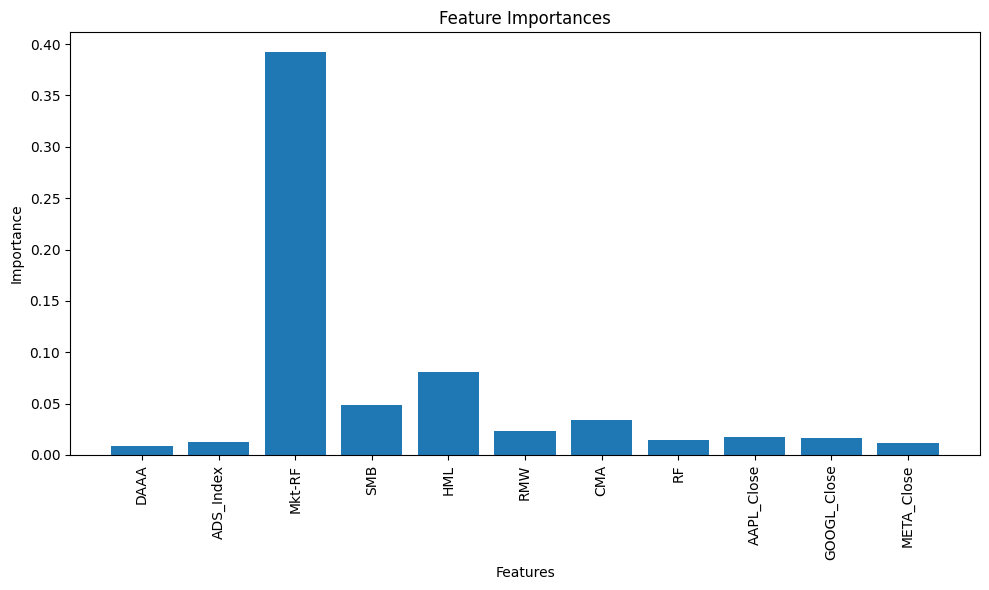

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.796
Model:                            OLS   Adj. R-squared (uncentered):              0.794
Method:                 Least Squares   F-statistic:                              441.4
Date:                Wed, 28 Jun 2023   Prob (F-statistic):                        0.00
Time:                        00:35:49   Log-Likelihood:                          4159.9
No. Observations:                1259   AIC:                                     -8298.
Df Residuals:                    1248   BIC:                                     -8241.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# Create an XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Train the model
xgb_model.fit(X, y)

# Get feature importances
importances = xgb_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort indices based on feature importance
indices = np.argsort(importances)[::-1]

# Filter features with importance above a threshold
threshold = 0.02
selected_features = [feature_names[i] for i in range(X.shape[1]) if importances[indices[i]] > threshold]

# Print feature ranking
print("Feature ranking:")
for i, feature_idx in enumerate(indices):
    if importances[feature_idx] > threshold:
        print(f"{i + 1}. Feature '{feature_names[feature_idx]}': {importances[feature_idx]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), [importances[feature_names.get_loc(feature)] for feature in selected_features])
plt.xticks(range(len(selected_features)), selected_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Select features for further analysis
x_selected = X[selected_features]
model = sm.OLS(y, x_selected).fit()
print(model.summary())
y_pred = model.predict(x_selected)
corr = ss.pearsonr(y_pred, y)[0]
print('Model: corr (Y, Y_pred) = ' + str(corr))
print('Selected features: ', selected_features)


## Random Forest Regressor



Feature ranking:
1. Feature 'DAAA': 0.007161089556370831
2. Feature 'ADS_Index': 0.008040240803406812
3. Feature 'Mkt-RF': 0.6886466477295609
4. Feature 'SMB': 0.03881105603686549
5. Feature 'HML': 0.06167394131829496
6. Feature 'RMW': 0.010643189269868706
7. Feature 'CMA': 0.01699121670184817


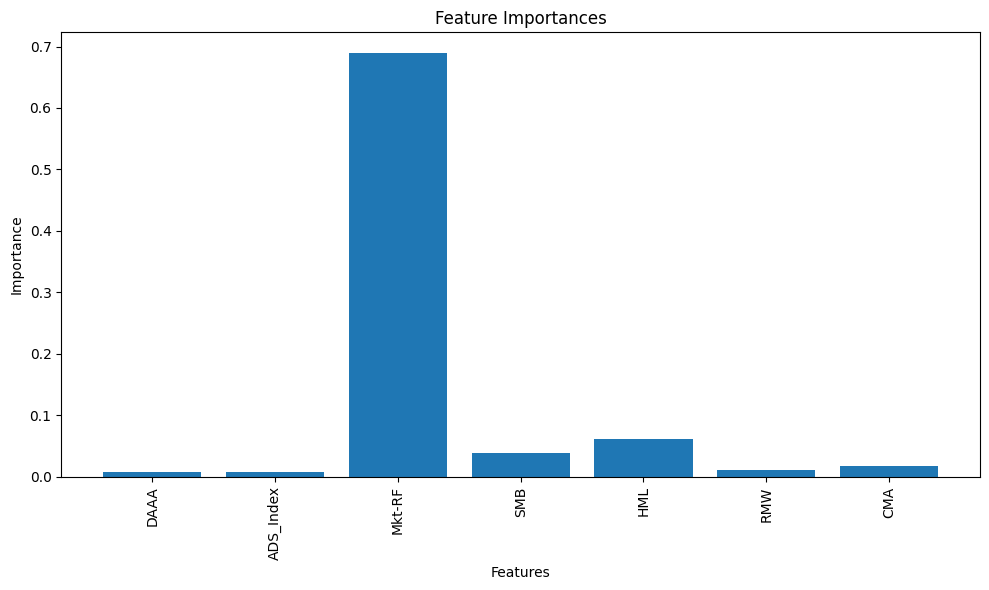

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.795
Model:                            OLS   Adj. R-squared (uncentered):              0.794
Method:                 Least Squares   F-statistic:                              694.9
Date:                Wed, 28 Jun 2023   Prob (F-statistic):                        0.00
Time:                        00:35:53   Log-Likelihood:                          4159.2
No. Observations:                1259   AIC:                                     -8304.
Df Residuals:                    1252   BIC:                                     -8268.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Create a Random Forest regressor
rf = RandomForestRegressor()

# Train the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Get feature names
feature_names = X.columns

# Sort indices based on feature importance
indices = np.argsort(importances)[::-1]

# Filter features with importance above a threshold
threshold = 0.01
selected_features = [feature_names[i] for i in range(X.shape[1]) if importances[indices[i]] > threshold]

# Print feature ranking
print("Feature ranking:")
for f in range(len(selected_features)):
    print(f"{f + 1}. Feature '{selected_features[f]}': {importances[feature_names.get_loc(selected_features[f])]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), [importances[feature_names.get_loc(feature)] for feature in selected_features])
plt.xticks(range(len(selected_features)), selected_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Select features for further analysis
x_selected = X[selected_features]
model = sm.OLS(y, x_selected).fit()
print(model.summary())
y_pred = model.predict(x_selected)
corr = ss.pearsonr(y_pred, y)[0]
print('Model: corr (Y, Y_pred) = ' + str(corr))
print('Selected features: ', selected_features)



In [ ]:
X=X[model2_select]

In [ ]:
X.shape

(1259, 10)

# Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=7, shuffle=False)






In [ ]:
X_train.shape

(881, 10)

In [ ]:
X_test.shape

(371, 10)

In [ ]:
X_val.shape

(7, 10)

# Model Training , Testing and Performance Evaluation

## KNeighborsRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print("KNN Regressor RMSE:", rmse_knn)

KNN Regressor RMSE: 0.01523290591192108


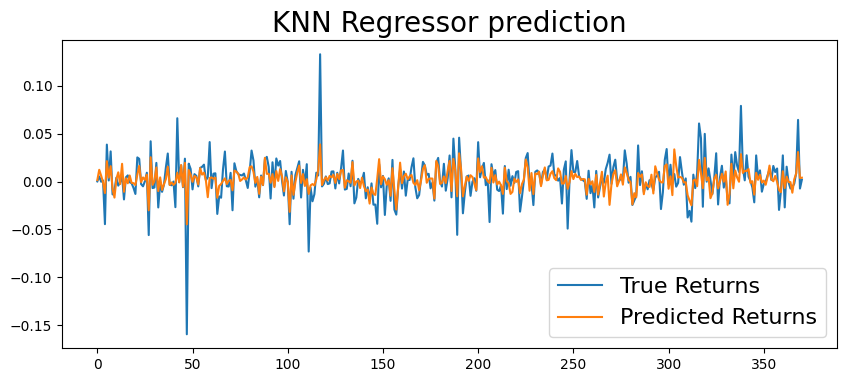

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(y_test)
preds, = plt.plot(y_pred_knn)
plt.title('KNN Regressor prediction', fontsize=20)
plt.legend(['True Returns', 'Predicted Returns'], fontsize=16)

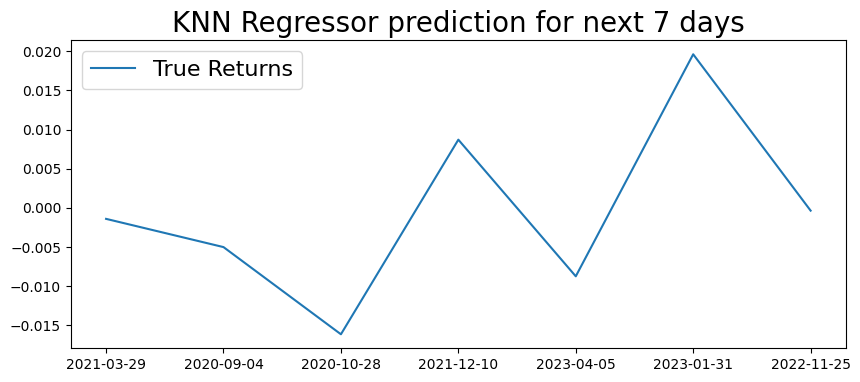

In [ ]:
y_pred_val= knn.predict(X_val)
plt.figure(figsize=(10,4))
preds, = plt.plot(X_val.index,y_pred_val)
plt.title('KNN Regressor prediction for next 7 days', fontsize=20)
plt.legend(['True Returns'], fontsize=16)

## Linear Regression

In [ ]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print("Linear Regression RMSE:", rmse_linear)



Linear Regression RMSE: 0.008291252338462278


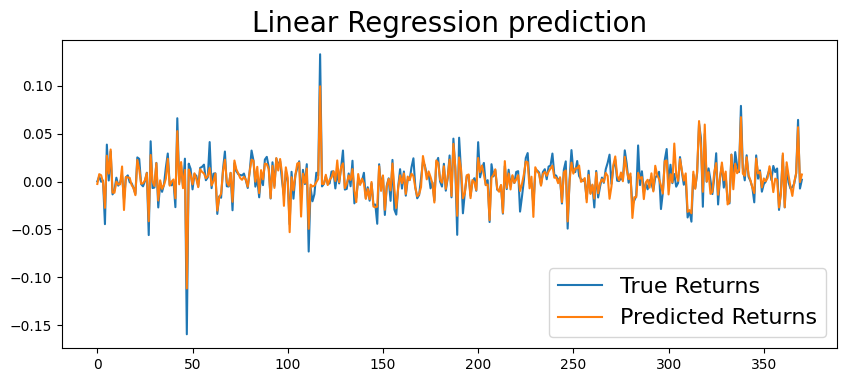

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(y_test)
preds, = plt.plot(y_pred_linear)
plt.title('Linear Regression prediction', fontsize=20)
plt.legend(['True Returns', 'Predicted Returns'], fontsize=16)

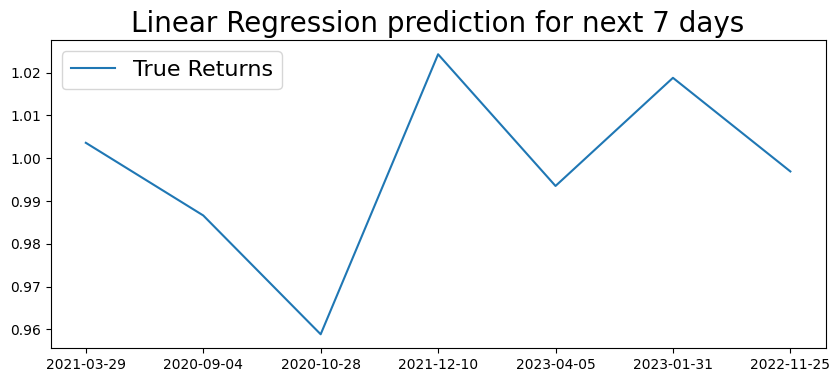

In [ ]:
y_pred_val= np.exp(linear_reg.predict(X_val))
plt.figure(figsize=(10,4))
preds, = plt.plot(X_val.index,y_pred_val)
plt.title('Linear Regression prediction for next 7 days', fontsize=20)
plt.legend(['True Returns'], fontsize=16)

## RandomForestRegressor

In [ ]:
# Create a Random Forest regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RandomForestRegressor RMSE:", rmse)

RandomForestRegressor RMSE: 0.011084772348575167


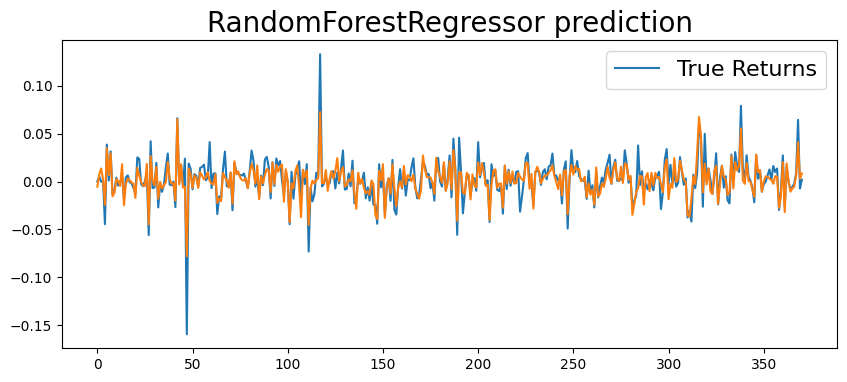

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(y_test)
preds, = plt.plot(y_pred)
plt.title('RandomForestRegressor prediction', fontsize=20)
plt.legend(['True Returns'], fontsize=16)

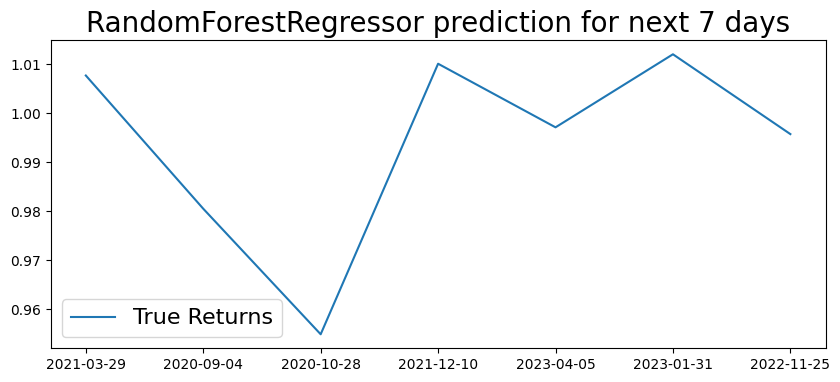

In [ ]:
y_pred_val= np.exp(rf.predict(X_val))
plt.figure(figsize=(10,4))
preds, = plt.plot(X_val.index,y_pred_val)
plt.title('RandomForestRegressor prediction for next 7 days', fontsize=20)
plt.legend(['True Returns'], fontsize=16)

## ANN Regression

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the architecture of the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


12/12 [==============================] - 0s 2ms/step
RMSE: 0.011454002263403255


For a regression problem, the most common activation function used in the dense layer is the linear activation function or no activation function at all. The linear activation function simply outputs the weighted sum of the inputs, allowing the network to directly predict continuous values without any non-linear transformation.

When performing regression, the goal is to predict a continuous output value, and the linear activation function is well-suited for this purpose. It allows the model to learn and output any real number without any restrictions or transformations.


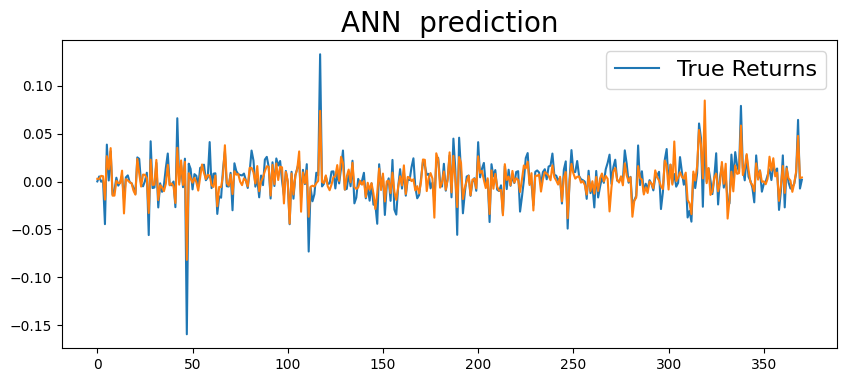

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(y_test)
preds, = plt.plot(y_pred)
plt.title('ANN  prediction', fontsize=20)
plt.legend(['True Returns'], fontsize=16)

1/1 [==============================] - 0s 69ms/step


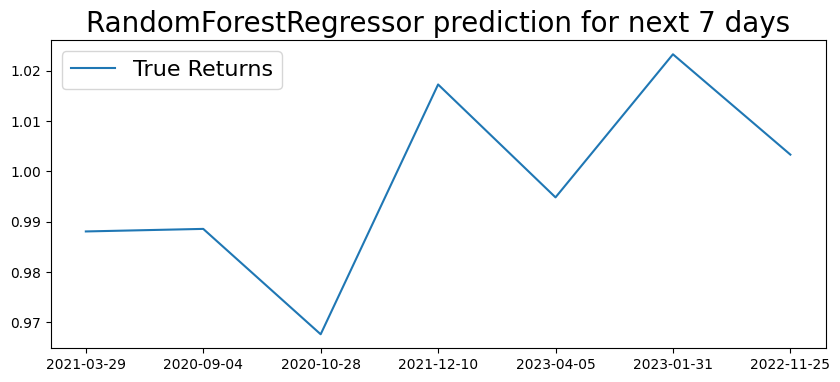

In [ ]:
y_pred_val= np.exp(model.predict(X_val))
plt.figure(figsize=(10,4))
preds, = plt.plot(X_val.index,y_pred_val)
plt.title('RandomForestRegressor prediction for next 7 days', fontsize=20)
plt.legend(['True Returns'], fontsize=16)

## Kalaman Filter

In [ ]:
pip install pykalman

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48442 sha256=083e84ff423a426d49186fb90e07724f74e61dc06580ae9b015c6e455009ddb4
  Stored in directory: /root/.cache/pip/wheels/76/33/ef/5f332226e13a5089c6dd4b01cc2bcb59491d18f955fa2d3807
Successfully built pykalman


In [ ]:
from pykalman import KalmanFilter
kf = KalmanFilter(
    initial_state_mean=0,  # Initial guess for the mean of the state
    initial_state_covariance=1,  # Initial guess for the covariance of the state
    observation_covariance=1,  # Measurement noise
    transition_covariance=0.01  # System noise
)


In [ ]:
state_means, _ = kf.filter(y_test)

In [ ]:
predicted_prices = state_means[:, 0]

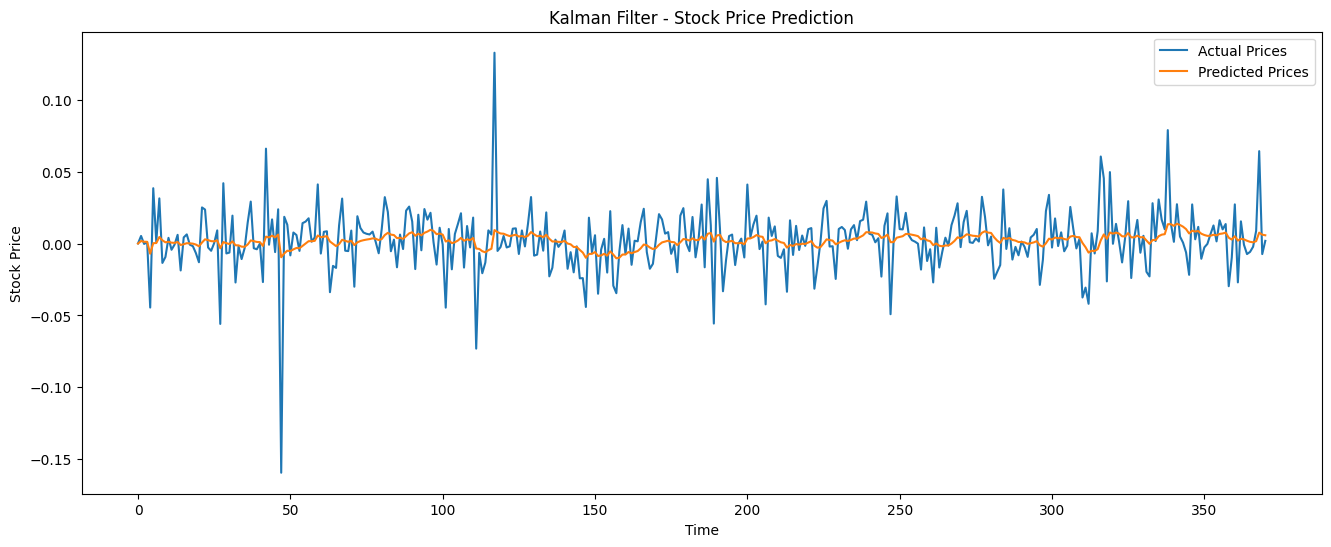

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test, label="Actual Prices")
plt.plot(predicted_prices, label="Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Kalman Filter - Stock Price Prediction")
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))
print("RandomForestRegressor RMSE:", rmse)

RandomForestRegressor RMSE: 0.020309020174637902


In [ ]:
import math
state,_= kf.filter(y_val)
predicted = state[:, 0]

In [ ]:
predicted_ar=[]
for i in predicted:
  predicted_ar.append(math.pow(10,i))

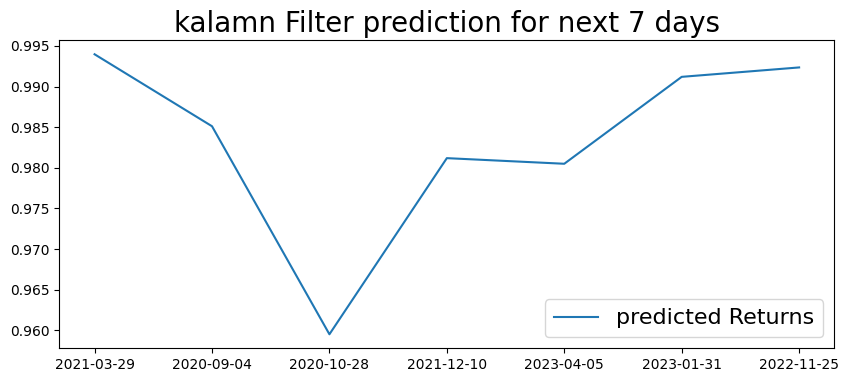

In [ ]:

plt.figure(figsize=(10,4))

preds, = plt.plot(X_val.index,predicted_ar)
plt.title('kalamn Filter prediction for next 7 days', fontsize=20)
plt.legend(['predicted Returns'], fontsize=16)

## GARCH Volatality Prediction


In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 49.4 MB/s eta 0:00:00


In [ ]:
start_date = datetime(2018,1,1)
end_date = datetime(2023,1,1)
STOCK = yf.download('MSFT', start_date, end_date)

STOCK.describe()

returns = 100 * STOCK['Adj Close'].pct_change().dropna()


[*********************100%***********************]  1 of 1 completed


In [ ]:


num_days = (end_date - start_date).days

print(num_days)


1826


In [ ]:
len(STOCK)

1259

Text(0.5, 1.0, 'DIS Returns')

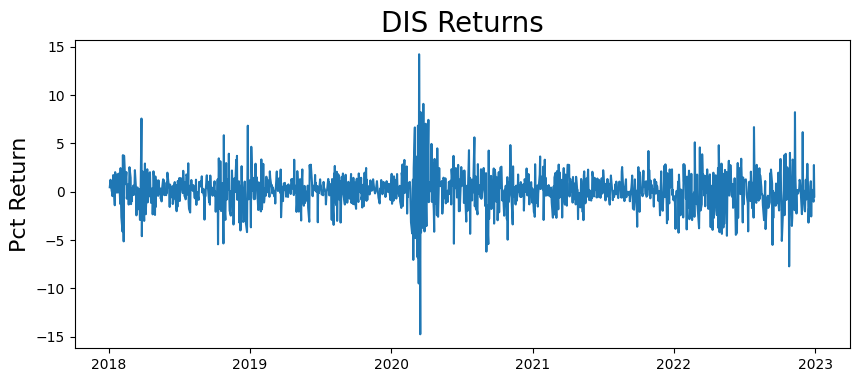

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


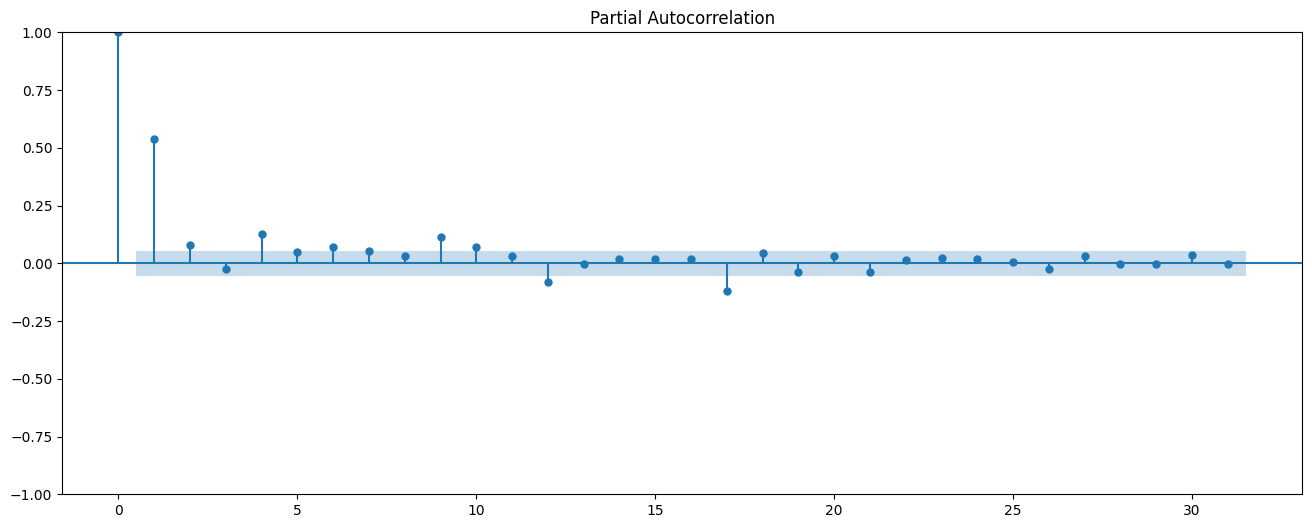

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(returns**2)
plt.show()

In [ ]:
from arch import arch_model
model = arch_model(returns, p=1, q=1)

In [ ]:
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6316.585647138161
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1626779.5926832943
Iteration:      3,   Func. Count:     21,   Neg. LLF: 2592.322123578064
Iteration:      4,   Func. Count:     29,   Neg. LLF: 2870.0418296994826
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2470.543349091904
Iteration:      6,   Func. Count:     44,   Neg. LLF: 2433.748798923589
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2433.7467946900842
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2433.746788432217
Iteration:      9,   Func. Count:     58,   Neg. LLF: 2433.7467884322496
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2433.746788432217
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2433.75
Distribution:                  Normal   AIC:                           4875.49
Method:            Maximum Likelihood   BIC:                           4896.04
                                        No. Observations:                 1258
Date:                Wed, Jun 28 2023   Df Residuals:                     1257
Time:                        00:14:41   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1588  4.022e-02      3.948  7.879e-05 [7.996e-02,  0.238]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1104  4.897e-02      2.254  2.417e-02 [1.442e-02,  0.206]
alpha[1]       0.1577  3.682e-02      4.283  1.843e-05 [8.553e-02,  0.230]
beta[1]        0.8197  4.164e-02     19.686  2.853e-86   [  0.738,  0.901]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
rolling_predictions = []
test_size = 365*3

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to 

In [ ]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*3:])

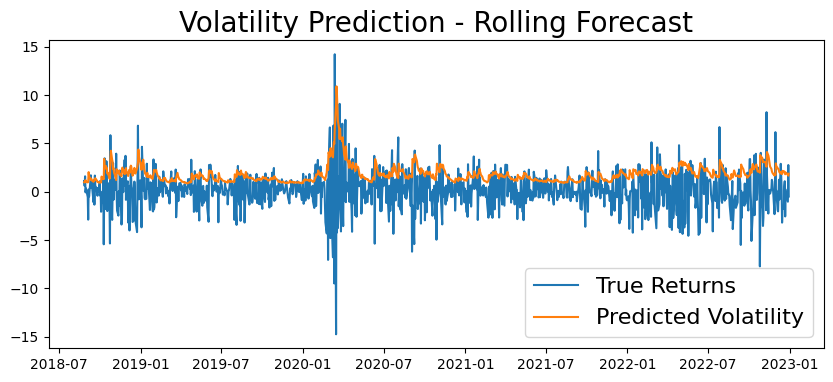

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*3:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [ ]:
from datetime import datetime, timedelta
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

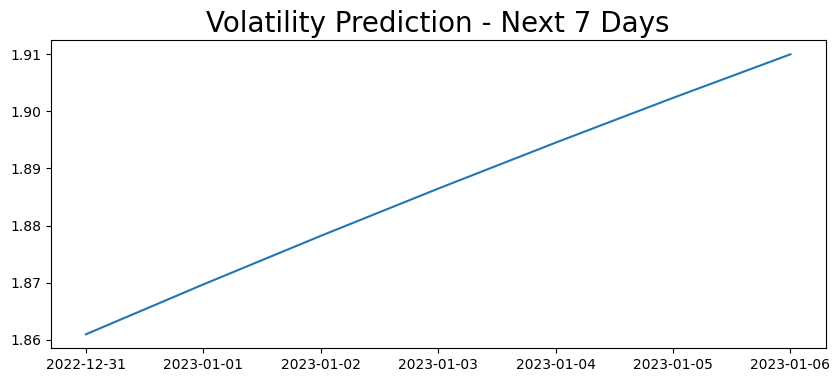

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)